<a href="https://colab.research.google.com/github/EgiNS/Data-Analysis/blob/main/Data_analysis_costumerchurn_R.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1. Import library yang diperlukan

  Sebelum kita mulai bekerja dengan R, pertama-tama kita harus mengimport terlebih dahulu library yang akan kita gunakan.

In [ ]:
library(dplyr)
library(ggplot2)
library(tidyverse)
library(purrr)
install.packages("janitor")
library(janitor)
install.packages("RCurl")
library(RCurl)
install.packages("GGally")
library(GGally)
install.packages("hrbrthemes")
library(hrbrthemes)

# 2. Membaca File CSV

  Setelah melakukan import library, yang perlu kita lakukan adalah membaca file csv yang akan kita gunakan sebagai dataframe. Untuk membaca suatu file csv, kita dapat menggunakan fungsi **read.csv()**. Kemudian, assign file tersebut ke suatu variabel. Disini, kami menggunakan nama variable df yang menyimpan nilai dari file csv tersebut.

In [ ]:
data <- getURL("https://raw.githubusercontent.com/IF-44-10/tubes-statistika/main/BankChurners.csv")
df <- read.csv(text = data)

# 3. Menampilkan ringkasan data
  
  Untuk menampilkan ringkasan dari data, kita dapat menggunakan fungsi **str()**. Fungsi ini akan menampilkan jumlah baris data dan variable, beserta dengan tipe datanya.

In [ ]:
str(df)

'data.frame':	10127 obs. of  23 variables:
 $ CLIENTNUM                                                                                                                         : int  768805383 818770008 713982108 769911858 709106358 713061558 810347208 818906208 710930508 719661558 ...
 $ Attrition_Flag                                                                                                                    : chr  "Existing Customer" "Existing Customer" "Existing Customer" "Existing Customer" ...
 $ Customer_Age                                                                                                                      : int  45 49 51 40 40 44 51 32 37 48 ...
 $ Gender                                                                                                                            : chr  "M" "F" "M" "F" ...
 $ Dependent_count                                                                                                                   : int  3 5 3 4 3 2 4 0

  
  Dari tampilan diatas, dapat kita ketahui bahwa data yang kita gunakan memiliki **10127 baris** dengan **23 variable(kolom)**. Tipe data pada data tersebut ada tiga, yaitu kategorik, integer(bilangan bulat), dan numerik(kontinu)

# 4. Eskplorasi Data

  Setelah melakukan langkah-langkah diatas, selanjutnya yang akan kita lakukan yaitu melakukan eskplorasi terhadap data yang kita miliki. Disini, kita akan mengeksplorasi setiap variable pada df dengan attrition flag dari customer, apakah customer tesebut masih menggunakan layanan bank ini(existing customer) atau sudah berhenti menggunakan layanan bank ini(attrited customer).

  Pertama, mari kita lihat terlebih dahulu perbandingan jumlah antara existing customer dengan attrited customer

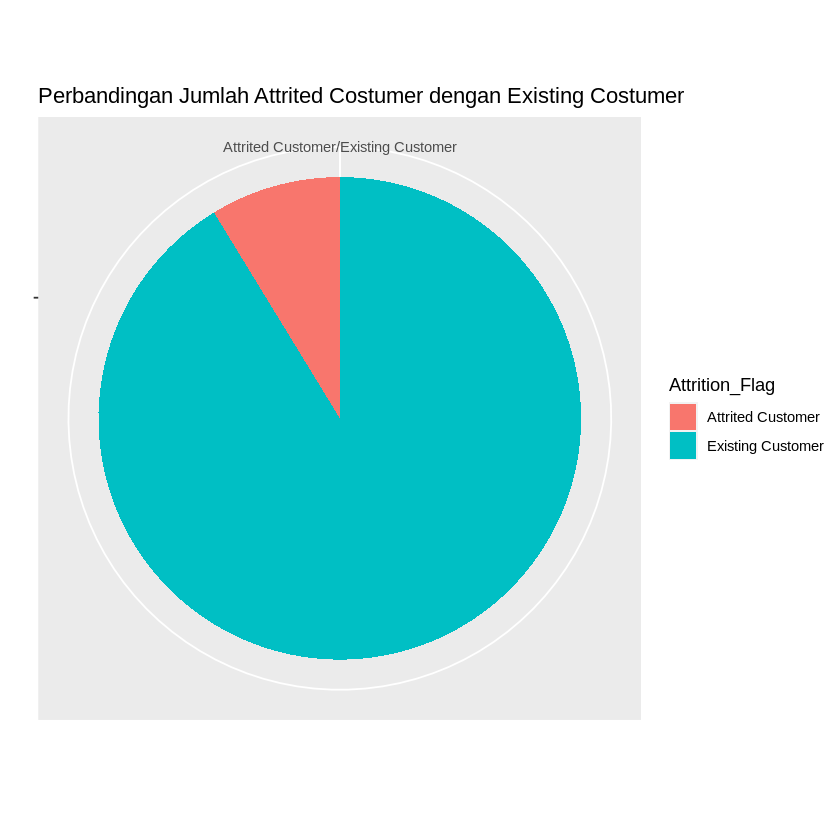

In [ ]:
ggplot(df, aes(x="", y=Attrition_Flag, fill=Attrition_Flag))+
geom_bar(width = 1, stat = "identity") +
coord_polar("y", start=0) +
labs(title="Perbandingan Jumlah Attrited Costumer dengan Existing Costumer", x=" ", y=" ")

In [ ]:
tabyl(df, Attrition_Flag) %>%
  adorn_pct_formatting(digits = 1)

Attrition_Flag,n,percent
<chr>,<dbl>,<chr>
Attrited Customer,1627,16.1%
Existing Customer,8500,83.9%


Pada pie chart tersebut, terlihat jelas bahwa jumlah existing customer jauh lebih banyak dibandingkan attrited customer. Existing customer berjumlah 8500 orang atau 83,9% dari seluruhnya. Sedangkan attrited customer hanya berjumlah 1657 orang atau 16,1% saja dari keseluruhan. Karena selisih jumlah keduanya sangat berjauhan, kita lebih baik menggunakan persentase dari jumlah tersebut dalam menentukan karakteristiknya.

Karena sekarang kita telah mengetahui perbandingan jumlahnya, maka tugas kita selanjutnya adalah mencari tahu karakteristik dari kedua kategori customer tersebut. 

Kita akan mengeksplorasi attrited customer dan existing customer dengan setiap variable(kolom) pada data. Sehingga nantinya akan ditemukan suatu gambaran secara umum tentang karakteristik attrited customer dan existing customer. Itu bisa kita dapatkan dengan melakukan visualisasi data, kemudian menghitung statistik deskriptifnya seperti mean, median, dan quartilnya.

#  A. Attrition Flag dengan Gender

Pertama, mari kita lihat tampilan dari barplotnya untuk mengetahui kategori mana yang terbanyak.

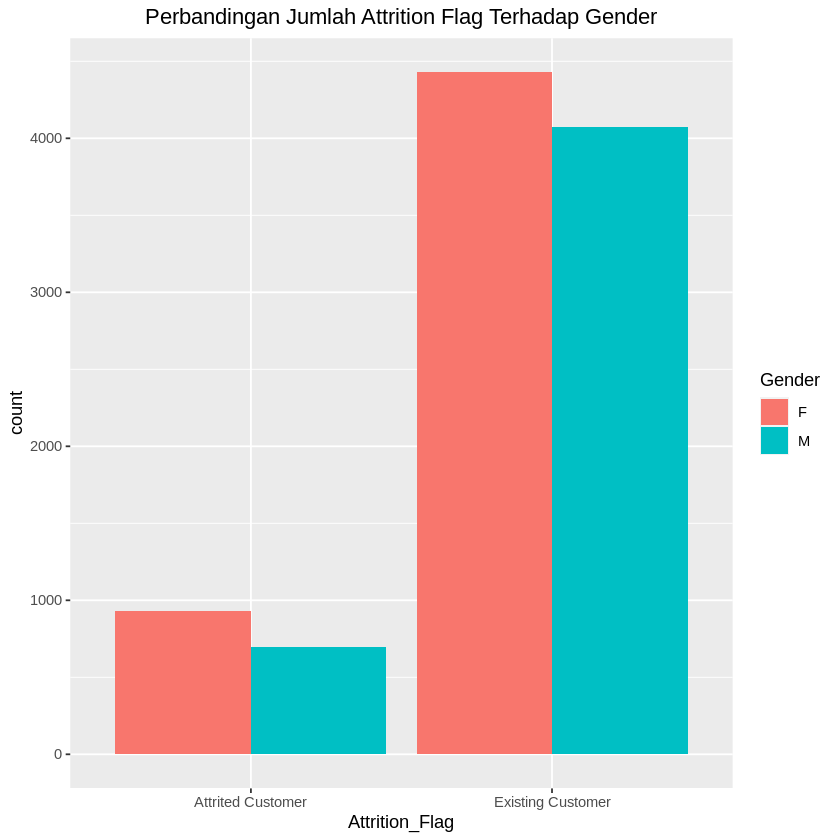

In [ ]:
ggplot(data=df, aes(x = Attrition_Flag, fill=Gender)) +
 labs(title="Perbandingan Jumlah Attrition Flag Terhadap Gender") +
 theme(plot.title = element_text(hjust=0.5)) +
 geom_bar(position="dodge")

Untuk memberikan nilai yang pasti, kita bisa menghitung persentase dari tiap bagiannya

In [ ]:
tabyl(df, Gender , Attrition_Flag) %>%
  adorn_percentages("col") %>%
  adorn_pct_formatting(digits = 1)

Gender,Attrited Customer,Existing Customer
<chr>,<chr>,<chr>
F,57.2%,52.1%
M,42.8%,47.9%


Pada attrited customer, jumlah F(Female/Wanita) lebih banyak dari M(Male/Pria) dengan selisih persentase 14,4%. 

Kemudian, pada existing customer, jumlah wanita juga lebih banyak daripada jumlah pria dengan selisih persentase 4,2%.



Setelah itu, kita akan melakukan analisis inferensia untuk menguji apakah ada hubungan antara Attrition Flag dengan Gender menggunakan chi-square test. Hipotesis yang kita miliki adalah sebagai berikut.

Ho : tidak ada hubungan antara keduanya

H1 : ada hubungan antara keduanya

In [ ]:
chisq.test(df$Gender, df$Attrition_Flag, correct=FALSE)


	Pearson's Chi-squared test

data:  df$Gender and df$Attrition_Flag
X-squared = 14.068, df = 1, p-value = 0.0001763


Nilai chi-squared yang dihasilkan adalah 14.068. Kemudian, karena kita mendapatkan nilai p-value kurang dari nilai signifikansi yaitu 0.05, maka kita menolak Ho dan menyimpulkan bahwa ada hubungan antara keduanya.

Jadi, dapat disimpulkan bahwa wanita merupakah jumlah terbanyak pada kedua jenis customer, dan selisih antara wanita dengan pria pada attrited customer lebih besar daripada existing customer, serta terdapat hubungan antara gender dengan attrition flag.

# B. Attrition Flag dengan Education Level

Pertama, mari kita lihat tampilan dari barplotnya untuk mengetahui kategori mana yang terbanyak.

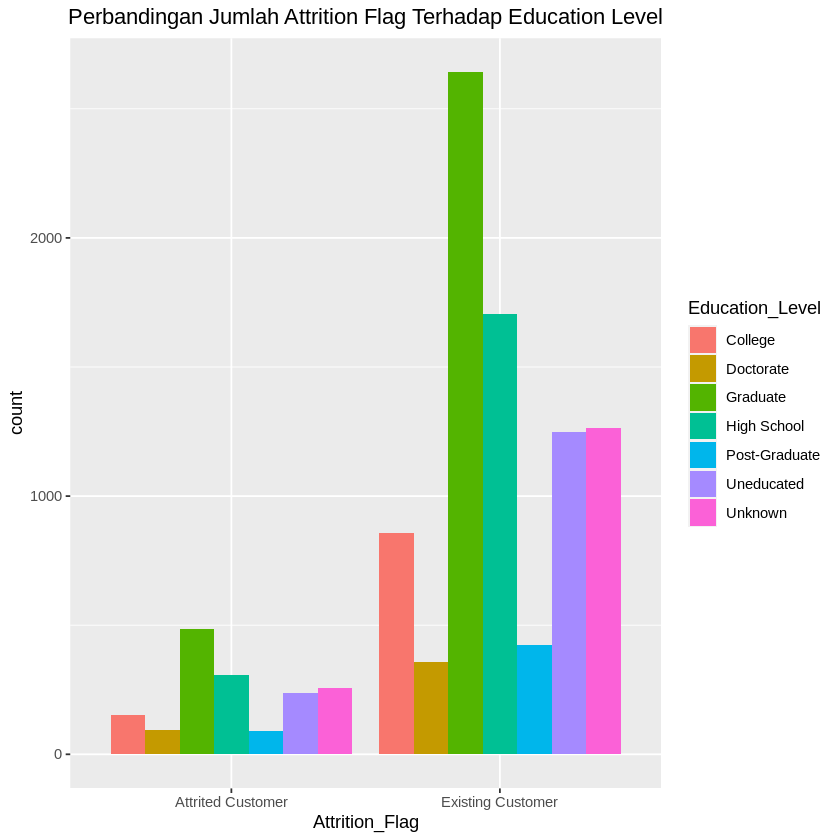

In [ ]:
ggplot(data=df, aes(x = Attrition_Flag, fill=Education_Level)) +
 labs(title="Perbandingan Jumlah Attrition Flag Terhadap Education Level") +
 theme(plot.title = element_text(hjust=0.5)) +
 geom_bar(position="dodge")

Untuk memberikan nilai yang pasti, kita bisa menghitung persentase dari tiap bagiannya

In [ ]:
tabyl(df,Education_Level, Attrition_Flag) %>%
  adorn_percentages("col") %>%
  adorn_pct_formatting(digits = 1)

Education_Level,Attrited Customer,Existing Customer
<chr>,<chr>,<chr>
College,9.5%,10.1%
Doctorate,5.8%,4.2%
Graduate,29.9%,31.1%
High School,18.8%,20.1%
Post-Graduate,5.7%,5.0%
Uneducated,14.6%,14.7%
Unknown,15.7%,14.9%


Jumlah customer dengan tingkat pendidikan graduate adalah yang terbanyak pada attrited customer, diikuti oleh high school pada posisi kedua. Sedangkan jumlah paling sedikitnya yaitu customer dengan tingkat pendidikan postgraduate.

Pada existing customer, jumlah customer dengan tingkat pendidikan graduate juga merupakan yang terbanyak, disusul oleh highschool pada posisi kedua. Dan jumlah paling sedikitnya yaitu postgraduate.

Dari sini, baik pada attrited customer maupun existing customer, kita dapat menilai bahwa jumlah customer di setiap tingkatan pendidikan memiliki urutan sama. Dimulai dari graduate, kemudian highschool, unknown, uneducated, college, doctorate, dan yang terakhir yaitu post-graduate. Selain itu, jumlah persentase di tiap tingkat pendidikan juga berdekatan atau hampir sama di kedua kategori tersebut.

Setelah itu, kita akan melakukan analisis inferensia untuk menguji apakah ada hubungan antara  Attrition Flag dengan Education Level menggunakan chi-square test. Hipotesis yang kita miliki adalah sebagai berikut.

Ho : tidak ada hubungan antara keduanya

H1 : ada hubungan antara keduanya

In [ ]:
chisq.test(df$Education_Level, df$Attrition_Flag, correct=FALSE)


	Pearson's Chi-squared test

data:  df$Education_Level and df$Attrition_Flag
X-squared = 12.511, df = 6, p-value = 0.05149


Nilai chi-squared yang dihasilkan adalah 12.511. Kemudian, karena kita mendapatkan nilai p-value yang lebih besar dari nilai signifikansi yaitu 0.05, maka kita menerima Ho dan menyimpulkan bahwa tidak ada hubungan antara keduanya.

# C. Attrition Flag dengan Marital Status



Pertama, mari kita lihat tampilan dari barplotnya untuk mengetahui kategori mana yang terbanyak.

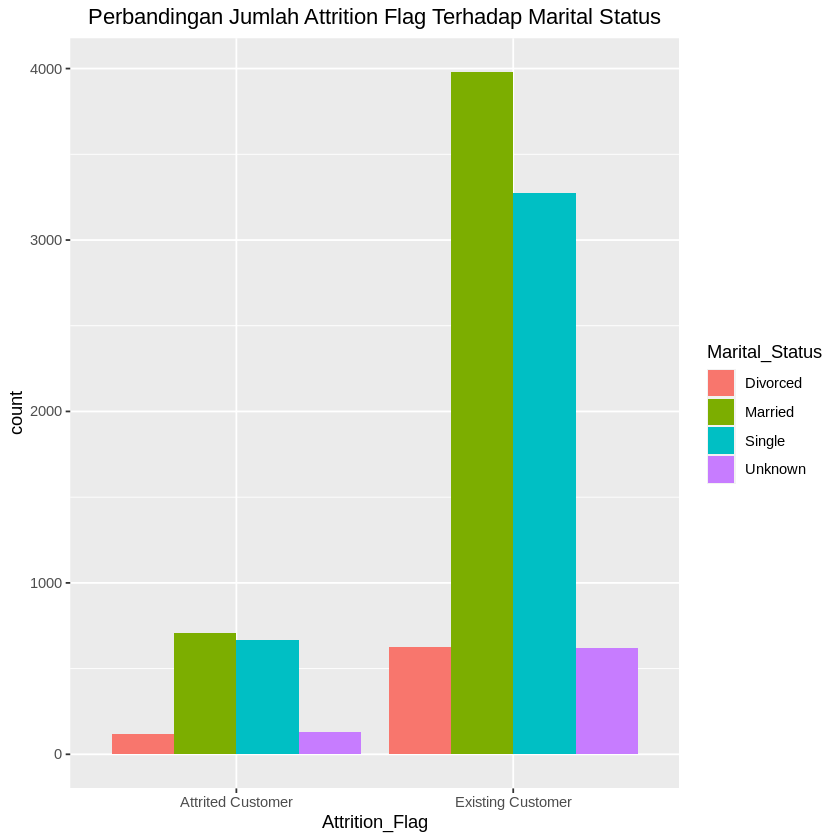

In [ ]:
ggplot(data=df, aes(x = Attrition_Flag, fill=Marital_Status)) +
 labs(title="Perbandingan Jumlah Attrition Flag Terhadap Marital Status") +
 theme(plot.title = element_text(hjust=0.5)) +
 geom_bar(position="dodge")


Untuk memberikan nilai yang pasti, kita bisa menghitung persentase dari tiap bagiannya

In [ ]:
tabyl(df, Marital_Status, Attrition_Flag) %>%
  adorn_percentages("col") %>%
  adorn_pct_formatting(digits = 1)

Marital_Status,Attrited Customer,Existing Customer
<chr>,<chr>,<chr>
Divorced,7.4%,7.4%
Married,43.6%,46.8%
Single,41.1%,38.5%
Unknown,7.9%,7.3%


Customer dengan status married merupakan yang terbanyak di pada attrited customer. Di posisi kedua single yang selisihnya hanya 2,5% dengan married. Dan yang paling sedikit yaitu customer dengan status divorced.

Sama seperti attrited customer, customer dengan status married juga yang terbanyak pada existing customer. Customer dengan status single juga mengisi posisi kedua dengan selisih jumlah persentase 8,3%. Sedangkan pada posisi terakhir adalah customer dengan status unknown.

Jadi, dapat diperoleh bahwa customer dengan status married adalah yang terbanyak pada attrited dan existing customer. Sedangkan yang paling sedikit, pada attrited customer adalah divorced, dan pada existing customer adalah unknown.

Setelah itu, kita akan melakukan analisis inferensia untuk menguji apakah ada hubungan antara Attrition Flag dan Marital Status menggunakan chi-square test. Hipotesis yang kita miliki adalah sebagai berikut.

Ho : tidak ada hubungan antara keduanya

H1 : ada hubungan antara keduanya

In [ ]:
chisq.test(df$Marital_Status, df$Attrition_Flag, correct=FALSE)


	Pearson's Chi-squared test

data:  df$Marital_Status and df$Attrition_Flag
X-squared = 6.0561, df = 3, p-value = 0.1089


Nilai chi-squared yang dihasilkan adalah 6.0561. Kemudian, karena kita mendapatkan nilai p-value yang lebih besar dari nilai signifikansi yaitu 0.05, maka kita menerima Ho dan menyimpulkan bahwa tidak ada hubungan antara keduanya.

# D. Attrition Flag dengan Income Category

Pertama, mari kita lihat tampilan dari barplotnya untuk mengetahui kategori mana yang terbanyak

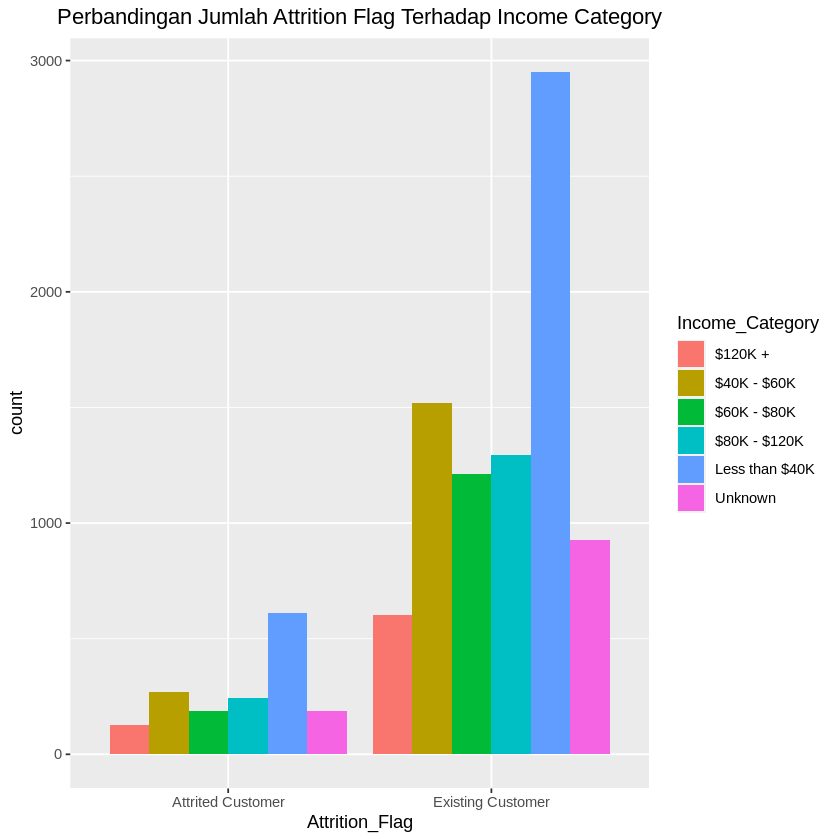

In [ ]:
ggplot(data=df, aes(x = Attrition_Flag, fill=Income_Category)) +
 labs(title="Perbandingan Jumlah Attrition Flag Terhadap Income Category") +
 theme(plot.title = element_text(hjust=0.5)) +
 geom_bar(position="dodge")

Untuk memberikan nilai yang pasti, kita bisa menghitung persentase dari tiap bagiannya

In [ ]:
tabyl(df, Income_Category, Attrition_Flag) %>%
  adorn_percentages("col") %>%
  adorn_pct_formatting(digits = 1)

Income_Category,Attrited Customer,Existing Customer
<chr>,<chr>,<chr>
$120K +,7.7%,7.1%
$40K - $60K,16.7%,17.9%
$60K - $80K,11.6%,14.3%
$80K - $120K,14.9%,15.2%
Less than $40K,37.6%,34.7%
Unknown,11.5%,10.9%


Jumlah customer dengan kategori pendapatan kurang dari 40K adalah yang terbanyak pada attrited customer, diikuti oleh kategori pendapatan 40K - 60K pada posisi kedua. Sedangkan jumlah paling sedikitnya yaitu customer dengan kategori pendapatan lebih dari 120K.

Pada existing customer, jumlah customer dengan kategori pendapatan kurang dari 40K juga merupakan yang terbanyak, disusul oleh kategori pendapatan 40K - 60K pada posisi kedua. Dan jumlah paling sedikitnya yaitu customer dengan kategori pendapatan lebih dari 120K.

Dari sini, baik pada attrited customer maupun existing customer, kita dapat menilai bahwa jumlah customer di setiap kategori pendapatan memiliki urutan sama. Dimulai dari kategori pendapatan kurang dari 40K, kemudian kategori pendapatan 40K - 60K, 80K - 120K, , 60K - 80K, Unknown, dan yang terakhir yaitu ustomer dengan kategori pendapatan lebih dari 120K. Selain itu, jumlah persentase di tiap tingkat pendidikan juga berdekatan di kedua kategori tersebut.

Setelah itu, kita akan melakukan analisis inferensia untuk menguji apakah ada hubungan antara Attrition Flag dan Income Category menggunakan chi-square test. Hipotesis yang kita miliki adalah sebagai berikut.

Ho : tidak ada hubungan antara keduanya

H1 : ada hubungan antara keduanya

In [ ]:
chisq.test(df$Income_Category, df$Attrition_Flag, correct=FALSE)


	Pearson's Chi-squared test

data:  df$Income_Category and df$Attrition_Flag
X-squared = 12.832, df = 5, p-value = 0.025


Nilai chi-squared yang dihasilkan adalah 12.832. Kemudian, karena kita mendapatkan nilai p-value lebih kecil dari nilai signifikansi yaitu 0.05, maka kita menolak Ho dan menyimpulkan bahwa ada hubungan antara keduanya.

# E. Attrition Flag dengan Card Category

Pertama, mari kita lihat tampilan dari barplotnya untuk mengetahui kategori mana yang terbanyak

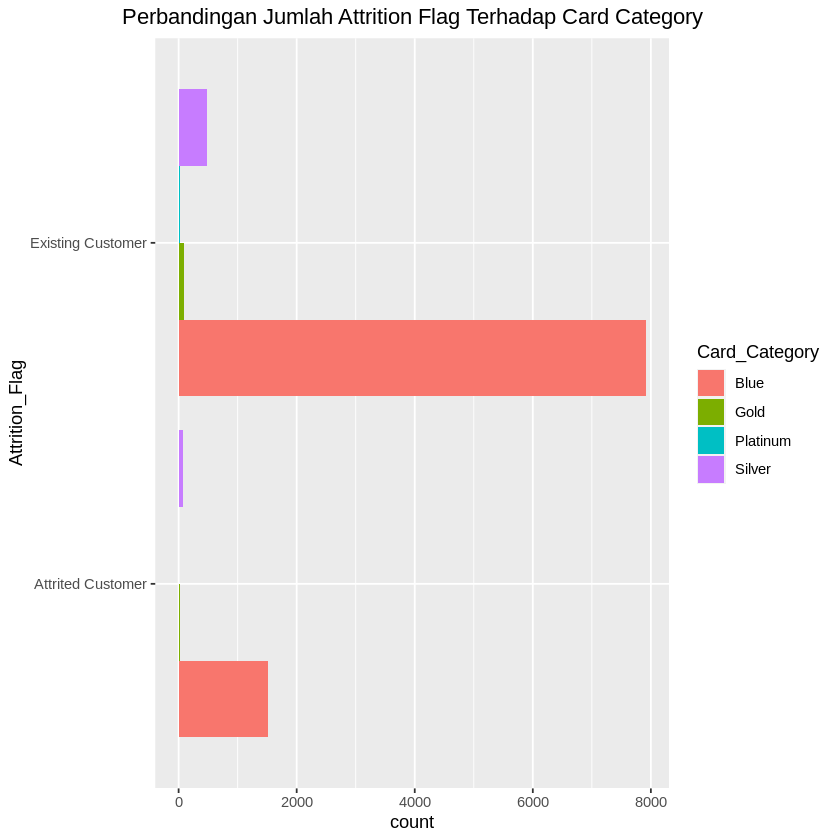

In [ ]:
ggplot(data=df, aes(x = Attrition_Flag, fill=Card_Category)) +
 labs(title="Perbandingan Jumlah Attrition Flag Terhadap Card Category") +
 theme(plot.title = element_text(hjust=0.5)) +
 geom_bar(position="dodge") +
 coord_flip()

Untuk memberikan nilai yang pasti, kita bisa menghitung persentase dari tiap bagiannya

In [ ]:
tabyl(df, Card_Category, Attrition_Flag) %>%
  adorn_percentages("col") %>%
  adorn_pct_formatting(digits = 1)

Card_Category,Attrited Customer,Existing Customer
<chr>,<chr>,<chr>
Blue,93.4%,93.1%
Gold,1.3%,1.1%
Platinum,0.3%,0.2%
Silver,5.0%,5.6%


Jumlah customer dengan card category blue adalah yang terbanyak pada attrited customer, diikuti oleh card category silver pada posisi kedua. Sedangkan jumlah paling sedikitnya yaitu customer dengan card category platinum.

Pada existing customer, jumlah customer dengan card category blue juga merupakan yang terbanyak, disusul oleh card category silver pada posisi kedua. Dan jumlah paling sedikitnya juga customer dengan card category platinum.

Dari sini, baik pada attrited customer maupun existing customer, kita dapat menilai bahwa jumlah customer di setiap kategori pendapatan memiliki urutan sama. Dimulai dari card category blue, kemudian card category silver, gold, dan yang terakhir yaitu customer dengan card category platinum. Selain itu, jumlah persentase di tiap tingkat pendidikan juga berdekatan di kedua kategori tersebut.

Setelah itu, kita akan melakukan analisis inferensia untuk menguji apakah ada hubungan antara  Attrition Flag dengan Card Category menggunakan chi-square test. Hipotesis yang kita miliki adalah sebagai berikut.

Ho : tidak ada hubungan antara keduanya

H1 : ada hubungan antara keduanya

In [ ]:
chisq.test(df$Card_Category, df$Attrition_Flag, correct=FALSE)

Warning message in stats::chisq.test(x, y, ...):
“Chi-squared approximation may be incorrect”



	Pearson's Chi-squared test

data:  df$Card_Category and df$Attrition_Flag
X-squared = 2.2342, df = 3, p-value = 0.5252


Nilai chi-squared yang dihasilkan adalah 2.2342. Kemudian, karena kita mendapatkan nilai p-value yang lebih besar dari nilai signifikansi yaitu 0.05, maka kita menerima Ho dan menyimpulkan bahwa tidak ada hubungan antara keduanya.

# F. Attrition Flag dengan Dependent Count

Pertama, mari kita lihat deskripsi statistik dari data.

In [ ]:
aggregate( Dependent_count ~ Attrition_Flag, df, summary )

Attrition_Flag,Dependent_count
<chr>,"<dbl[,6]>"
Attrited Customer,"0, 2, 2, 2.402581, 3, 5"
Existing Customer,"0, 1, 2, 2.335412, 3, 5"


Diatas telah terlampir nilai minimal, Q1, Q2/Median, Mean, Q3, dan nilai maksimal dari dependent count terhadap attrition flag secara berurutan.
Dapat kita lihat bahwa terdapat perbedaan mean pada attrited customer dan existing customer, dimana mean untuk dependent count dari attrited customer lebih besar daripada existing customer.



Kemudian, mari kita lihat tampilan dari barplotnya untuk mengetahui kategori mana yang terbanyak

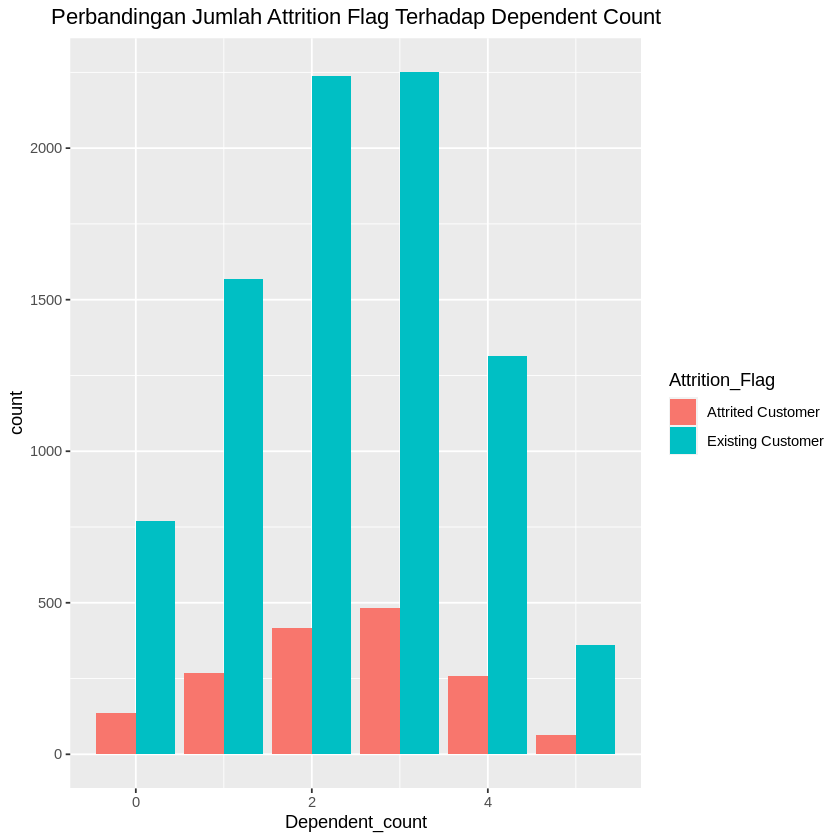

In [ ]:
ggplot(data=df, aes(x = Dependent_count, fill=Attrition_Flag)) +
  labs(title="Perbandingan Jumlah Attrition Flag Terhadap Dependent Count") +
  theme(plot.title = element_text(hjust=0.5)) +
  geom_bar(position="dodge")


Untuk memberikan nilai yang pasti, kita bisa menghitung persentase dari tiap bagiannya

In [ ]:
tabyl(df, Dependent_count, Attrition_Flag) %>%
  adorn_percentages("col") %>%
  adorn_pct_formatting(digits = 1)

Dependent_count,Attrited Customer,Existing Customer
<int>,<chr>,<chr>
0,8.3%,9.0%
1,16.5%,18.5%
2,25.6%,26.3%
3,29.6%,26.5%
4,16.0%,15.5%
5,3.9%,4.2%


Customer dengan dependent count 3 adalah yang terbanyak pada attrited customer, diikuti dengan dependent count 2 pada posisi kedua. Sedangkan attrited customer yang memiliki dependent count 5 yang paling sedikit jumlahnya.

Pada existing customer, jumlah customer dengan dependent count 3 juga merupakan yang terbanyak, disusul oleh dependent count 2 pada posisi kedua dengan selisih yang sangat kecil. Dan jumlah paling sedikitnya juga customer dengan dependent count 5.

Maka, dapat kita peroleh fakta bahwa customer dengan dependent count 3 adalah yang terbanyak pada attrited dan existing customer. Selain itu, customer dengan dependent count 5 juga merupakan yang paling sedikit pada attrited dan existing customer.

# G. Attrition Flag dengan Total Relationship Count

Pertama, mari kita lihat deskripsi statistik dari data.

In [ ]:
aggregate( Total_Relationship_Count ~ Attrition_Flag, df, summary )

Attrition_Flag,Total_Relationship_Count
<chr>,"<dbl[,6]>"
Attrited Customer,"1, 2, 3, 3.279656, 5, 6"
Existing Customer,"1, 3, 4, 3.914588, 5, 6"


Diatas telah terlampir nilai minimal, Q1, Q2/Median, Mean, Q3, dan nilai maksimal dari total relationship count terhadap attrition flag secara berurutan. Dapat kita lihat bahwa terdapat perbedaan mean pada attrited customer dan existing customer, dimana mean untuk total relationship count dari attrited customer lebih kecil daripada existing customer.

Kemudian, mari kita lihat tampilan dari barplotnya untuk mengetahui kategori mana yang terbanyak

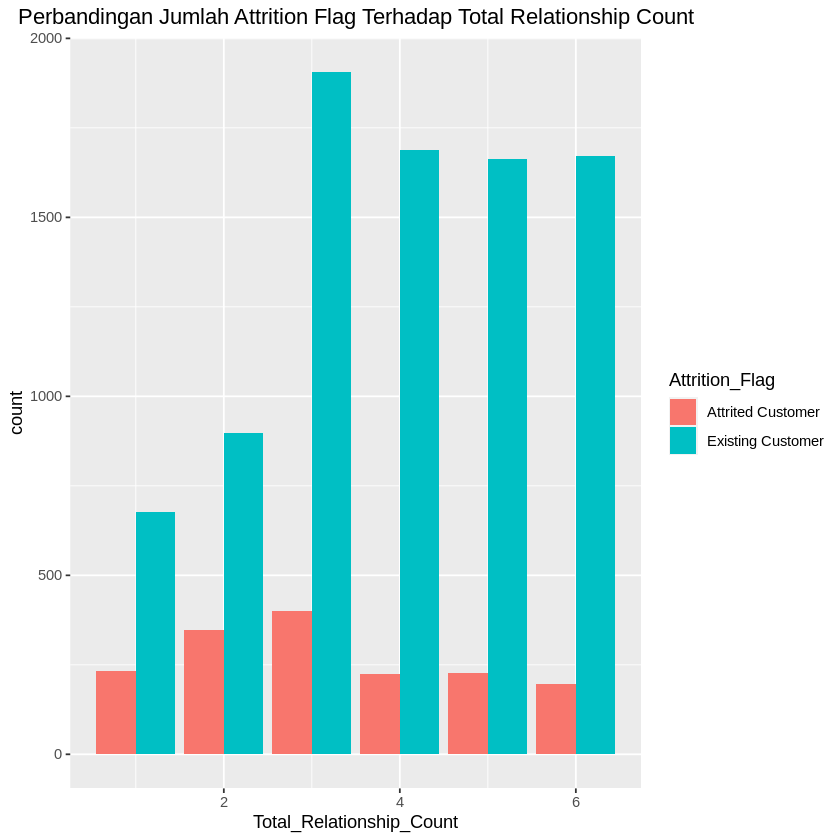

In [ ]:
ggplot(data=df, aes(x = Total_Relationship_Count, fill=Attrition_Flag)) +
  labs(title="Perbandingan Jumlah Attrition Flag Terhadap Total Relationship Count") +
  theme(plot.title = element_text(hjust=0.5)) +
  geom_bar(position="dodge")

Untuk memberikan nilai yang pasti, kita bisa menghitung persentase dari tiap bagiannya

In [ ]:
tabyl(df, Total_Relationship_Count, Attrition_Flag) %>%
  adorn_percentages("col") %>%
  adorn_pct_formatting(digits = 1)

Total_Relationship_Count,Attrited Customer,Existing Customer
<int>,<chr>,<chr>
1,14.3%,8.0%
2,21.3%,10.6%
3,24.6%,22.4%
4,13.8%,19.8%
5,14.0%,19.6%
6,12.0%,19.6%


Kita memperoleh hasil bahwa Customer dengan total relationship sebanyak 3 adalah yang terbanyak pada attrited dan existing customer. Namun, terdapat hal yang kontras pada jumlah yang paling sedikitnya. Pada attrited customer, customer yang memiliki total relationship sebanyak 6 yang paling sedikit. Sedangkan pada existing customer, customer dengan total relationship sebanyak 1 adalah yang paling sedikit.

# H. Attrition Flag dengan Months Inactive in Last 12 Months

Pertama, mari kita lihat deskripsi statistik dari data.

In [ ]:
aggregate( Months_Inactive_12_mon ~ Attrition_Flag, df, summary )

Attrition_Flag,Months_Inactive_12_mon
<chr>,"<dbl[,6]>"
Attrited Customer,"0, 2, 3, 2.693301, 3, 6"
Existing Customer,"0, 1, 2, 2.273765, 3, 6"


Diatas telah terlampir nilai minimal, Q1, Q2/Median, Mean, Q3, dan nilai maksimal dari Jumlah Tidak Aktif Dalam 12 Bulan terakhir terhadap attrition flag secara berurutan. Dapat kita lihat bahwa terdapat perbedaan mean pada attrited customer dan existing customer, dimana mean untuk Jumlah Tidak Aktif Dalam 12 Bulan terakhir dari attrited customer lebih besar daripada existing customer



Kemudian, mari kita lihat tampilan dari barplotnya untuk mengetahui kategori mana yang terbanyak

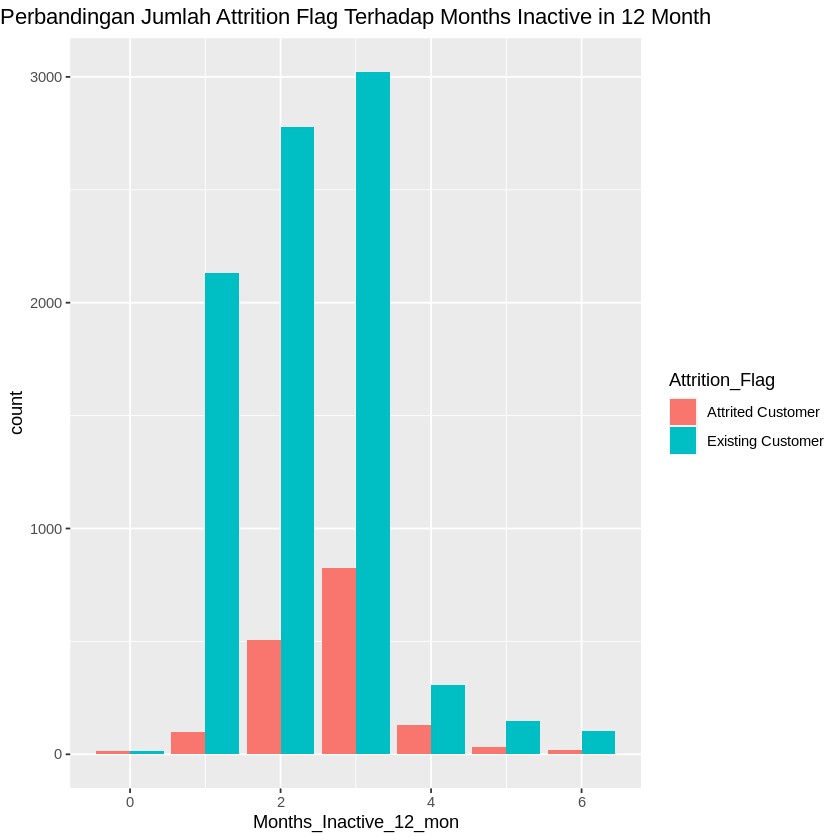

In [ ]:
ggplot(data=df, aes(x = Months_Inactive_12_mon, fill=Attrition_Flag)) +
  labs(title="Perbandingan Jumlah Attrition Flag Terhadap Months Inactive in 12 Month") +
  theme(plot.title = element_text(hjust=0.5)) +
  geom_bar(position="dodge")

Untuk memberikan nilai yang pasti, kita bisa menghitung persentase dari tiap bagiannya

In [ ]:
tabyl(df, Months_Inactive_12_mon, Attrition_Flag) %>%
  adorn_percentages("col") %>%
  adorn_pct_formatting(digits = 1)

Months_Inactive_12_mon,Attrited Customer,Existing Customer
<int>,<chr>,<chr>
0,0.9%,0.2%
1,6.1%,25.1%
2,31.0%,32.7%
3,50.8%,35.5%
4,8.0%,3.6%
5,2.0%,1.7%
6,1.2%,1.2%


Kita memperoleh hasil bahwa Customer yang tidak aktif selama 4 bulan dalam 12 bulan terakhir adalah yang terbanyak pada attrited dan existing customer. Sedangkan customer yang tidak pernah tidak aktif (0 bulan) dalam 12 bulan terakhir adalah jumlah yang paling sedikit pada attrited dan existing customer

# I. Attrition Flag dengan Contact Count in Last 12 Months

Pertama, mari kita lihat deskripsi statistik dari data.

In [ ]:
aggregate( Contacts_Count_12_mon ~ Attrition_Flag, df, summary )

Attrition_Flag,Contacts_Count_12_mon
<chr>,"<dbl[,6]>"
Attrited Customer,"0, 2, 3, 2.972342, 4, 6"
Existing Customer,"0, 2, 2, 2.356353, 3, 5"


Diatas telah terlampir nilai minimal, Q1, Q2/Median, Mean, Q3, dan nilai maksimal dari  Contact Count dalam 12 bulan terakhir terhadap attrition flag secara berurutan. Dapat kita lihat bahwa terdapat perbedaan mean pada attrited customer dan existing customer, dimana mean untuk  Contact Count dalam 12 bulan terakhir dari attrited customer lebih besar daripada existing customer

Pertama, mari kita lihat tampilan dari barplotnya untuk mengetahui kategori mana yang terbanyak.

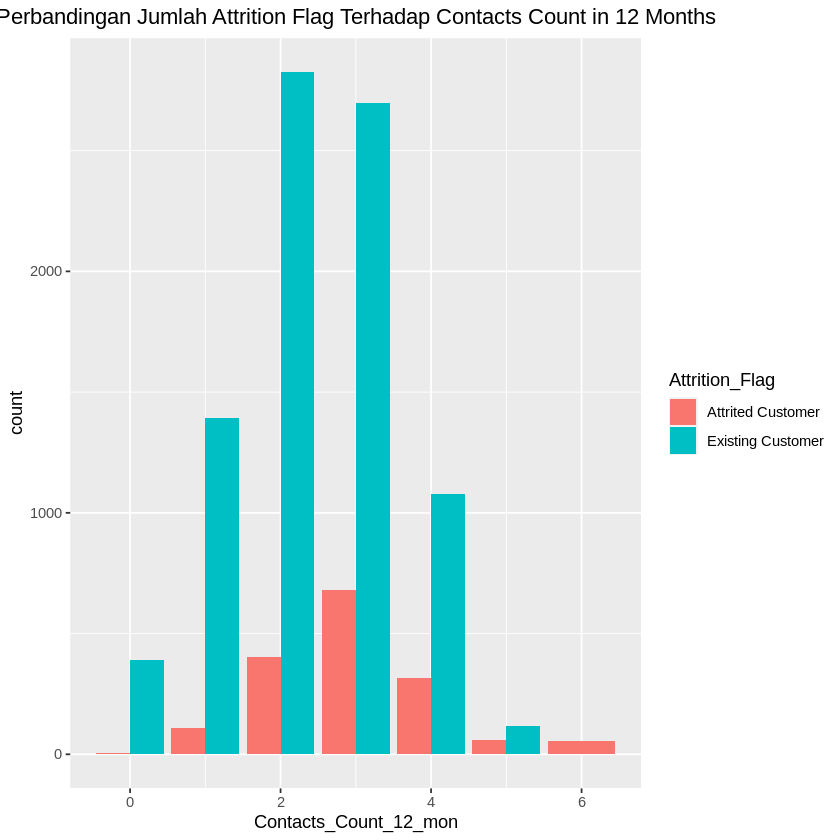

In [ ]:
ggplot(data=df, aes(x = Contacts_Count_12_mon, fill=Attrition_Flag)) +
  labs(title="Perbandingan Jumlah Attrition Flag Terhadap Contacts Count in 12 Months") +
  theme(plot.title = element_text(hjust=0.5)) +
  geom_bar(position="dodge")

Untuk memberikan nilai yang pasti, kita bisa menghitung persentase dari tiap bagiannya.

In [ ]:
tabyl(df, Contacts_Count_12_mon, Attrition_Flag) %>%
  adorn_percentages("col") %>%
  adorn_pct_formatting(digits = 1)

Contacts_Count_12_mon,Attrited Customer,Existing Customer
<int>,<chr>,<chr>
0,0.4%,4.6%
1,6.6%,16.4%
2,24.8%,33.2%
3,41.9%,31.8%
4,19.4%,12.7%
5,3.6%,1.4%
6,3.3%,0.0%


Pada variabel contact count, kita dapat menemukan suatu hal yang berbeda. Customer dengan contact count sebanyak 3 dalam 12 bulan terakhir adalah yang terbanyak pada attrited customer. Sedangkan customer dengan contact count sebanyak 2 dalam 12 bulan terakhir adalah yang terbanyak pada existing customer.

Begitu pula dengan jumlah paling sedikitnya. Customer yang tidak memiliki contact count (0) adalah yang paling sedikit pada Attrited customer. Sedangkan  customer dengan contact count sebanyak 6 adalah yang paling sedikit pada existing customer.

# J. Attrition Flag dengan Customer Age

Pertama, mari kita lihat deskripsi statistik dari data

In [ ]:
aggregate( Customer_Age ~ Attrition_Flag, df, summary )

Attrition_Flag,Customer_Age
<chr>,"<dbl[,6]>"
Attrited Customer,"26, 41, 47, 46.65950, 52, 68"
Existing Customer,"26, 41, 46, 46.26212, 52, 73"


Diatas telah terlampir nilai minimal, Q1, Q2/Median, Mean, Q3, dan nilai maksimal dari Customer age terhadap attrition flag secara berurutan

Dapat kita lihat bahwa mean dan median untuk customer age dari attrited customer lebih besar daripada existing customer. Kemudian, nilai minimal dari keduanya sama, dan nilai maksimal dari existing customer lebih besar.


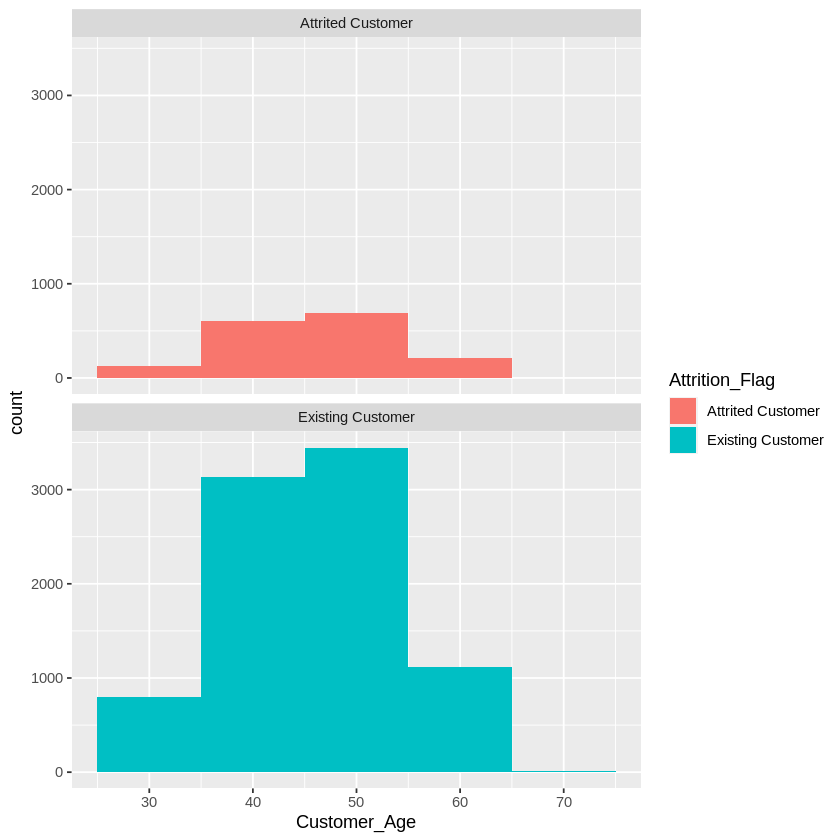

In [ ]:
ggplot(data=df, aes(x=Customer_Age, fill=Attrition_Flag)) +
 geom_histogram(binwidth = 10) +
 facet_wrap(~Attrition_Flag, ncol=1)

Pada histogram dengan interval 10 tersebut, dapat kita lihat bahwa jumlah customer dengan umur antara 45 sampai 55 tahun adalah yang terbanyak pada attrited dan existing customer. Sedangkan customer dengan umur berkisar antara 25 sampai 35 adalah yang paling sedikit pada attrited customer, sedangkan customer dengan umur lebih besar dari 65 tahun adalah yang paling sedikit pada existing customer.

Sekarang, kita bisa melihat penyebaran datanya menggunakan boxplot dan density plot.

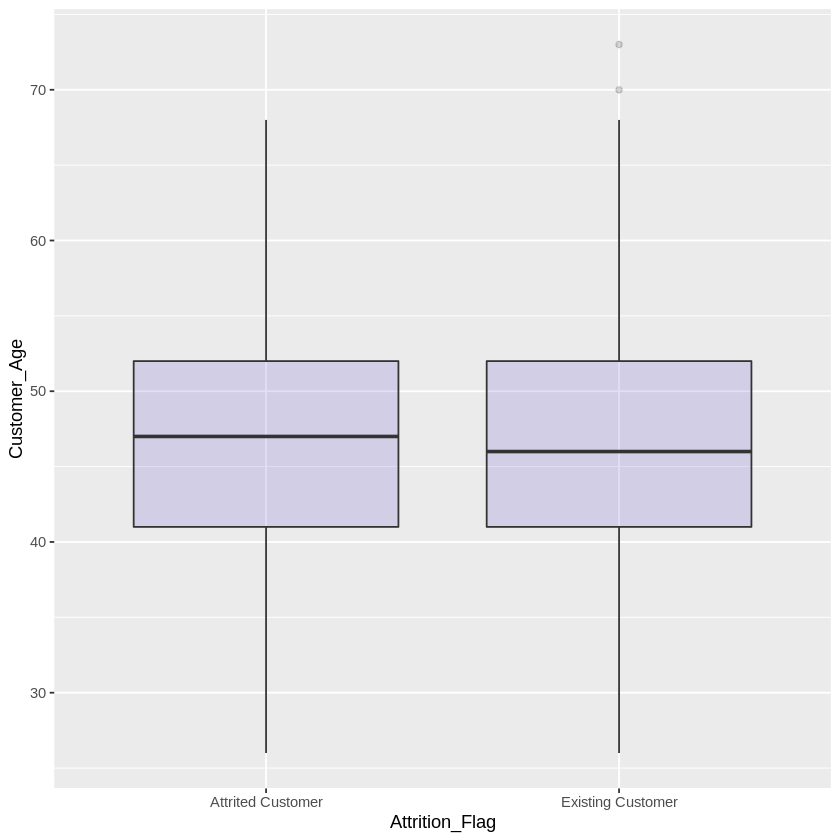

In [ ]:
ggplot(data=df, aes(x=Attrition_Flag , y=Customer_Age)) + 
    geom_boxplot(fill="slateblue", alpha=0.2)

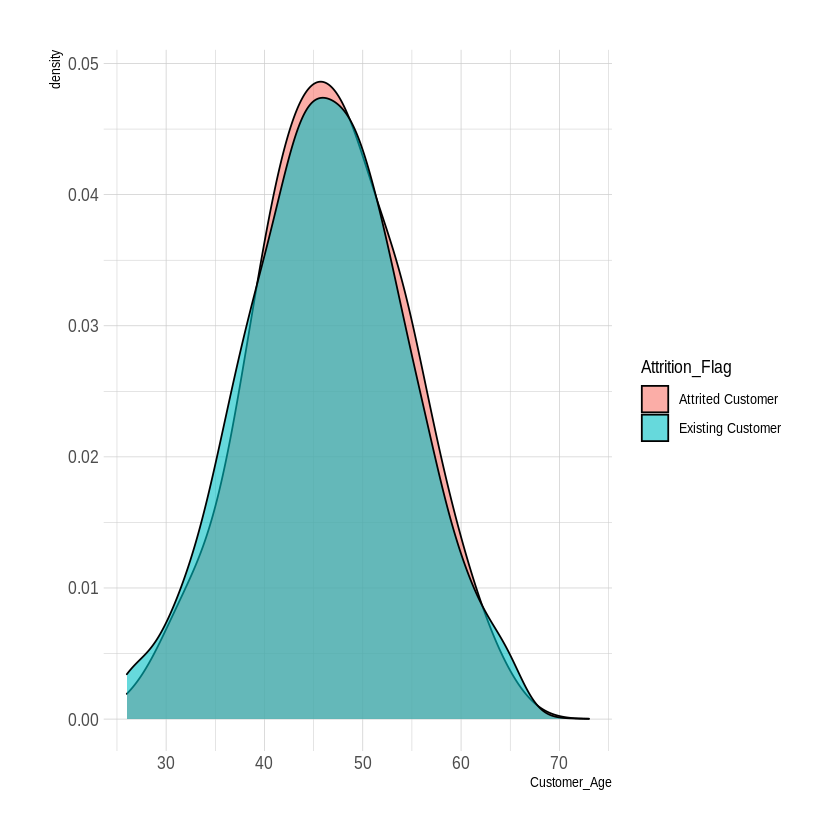

In [ ]:
ggplot(data=df, aes(x=Customer_Age, group=Attrition_Flag, fill=Attrition_Flag)) +
    geom_density(adjust=1.5, alpha=.6) +
    theme_ipsum()

Dari boxplot diatas, kita dapat melihat dua nilai pencilan yang tidak terlalu jauh pada existing customer, panjang IQR yang tidak jauh berbeda, serta panjang boxplot keduanya hampir sama yang menandakan penyebaran data antara keduanya yang cenderung sama. 

Hal ini diperkuat dengan density plot bahwa penyebaran nilai customer age pada keduanya cenderung sama dan membentuk suatu grafik yang cenderung simetris sehingga tidak menimbulkan kemencengan pada salah satu sisi. Density paling besar atau yang paling banyak muncul pada keduanya sama-sama pada nilai sekitar 46 dengan nilai density maksimum yang lebih besar pada attrited customer.

# K. Attrition Flag dengan Months on book

Pertama, mari kita lihat deskripsi statistik dari data

In [ ]:
aggregate( Months_on_book ~ Attrition_Flag, df, summary )

Attrition_Flag,Months_on_book
<chr>,"<dbl[,6]>"
Attrited Customer,"13, 32, 36, 36.17824, 40, 56"
Existing Customer,"13, 31, 36, 35.88059, 40, 56"


Diatas telah terlampir nilai minimal, Q1, Q2/Median, Mean, Q3, dan nilai maksimal dari Jumlah months on book terhadap attrition flag secara berurutan. 

Dapat kita lihat bahwa mean untuk Jumlah months on book dari attrited customer lebih kecil daripada existing customer, tetapi keduanya memiliki nilai median yang sama. Kemudian, nilai minimal dari keduanya juga sama, begitu pula dengan nilai maksimalnya.

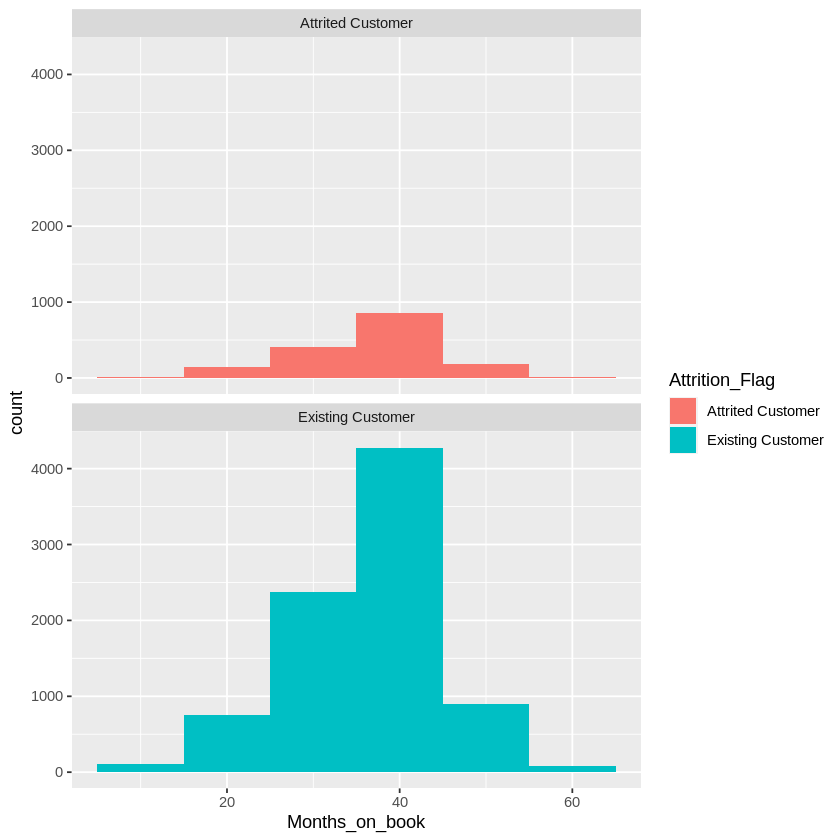

In [ ]:
ggplot(data=df, aes(x=Months_on_book, fill=Attrition_Flag)) +
 geom_histogram(binwidth = 10) +
 facet_wrap(~Attrition_Flag, ncol=1)

Pada histogram dengan interval 10 tersebut, dapat kita lihat bahwa jumlah customer dengan months on book antara 35 sampai 45 bulan adalah yang terbanyak pada attrited dan existing customer.

Sekarang, kita bisa melihat penyebaran datanya menggunakan boxplot dan density plot.

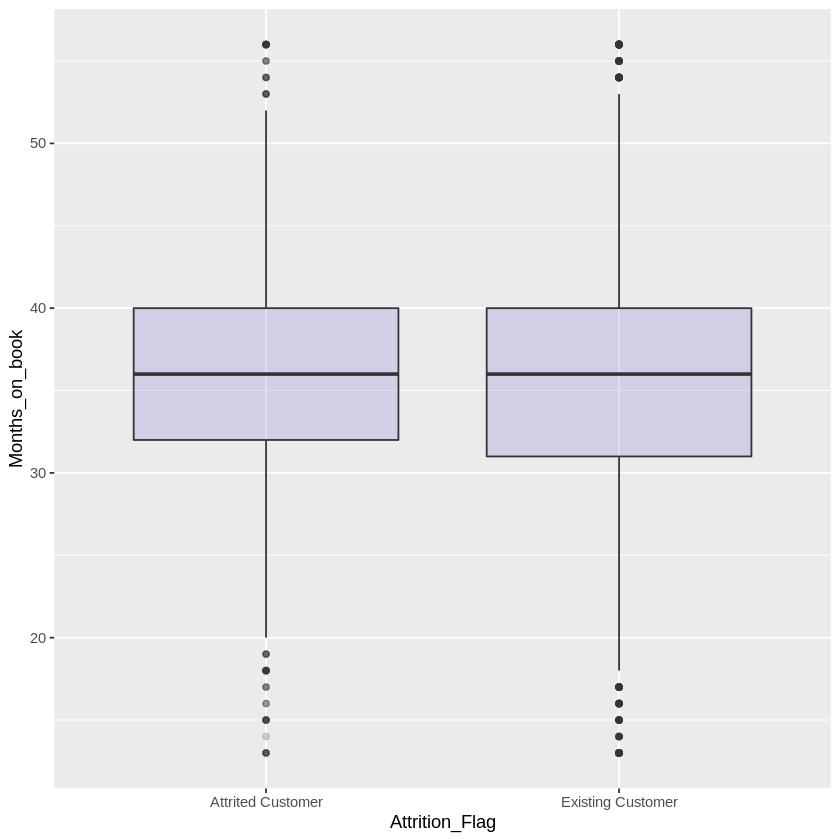

In [ ]:
ggplot(data=df, aes(x=Attrition_Flag , y=Months_on_book)) + 
    geom_boxplot(fill="slateblue", alpha=0.2) 

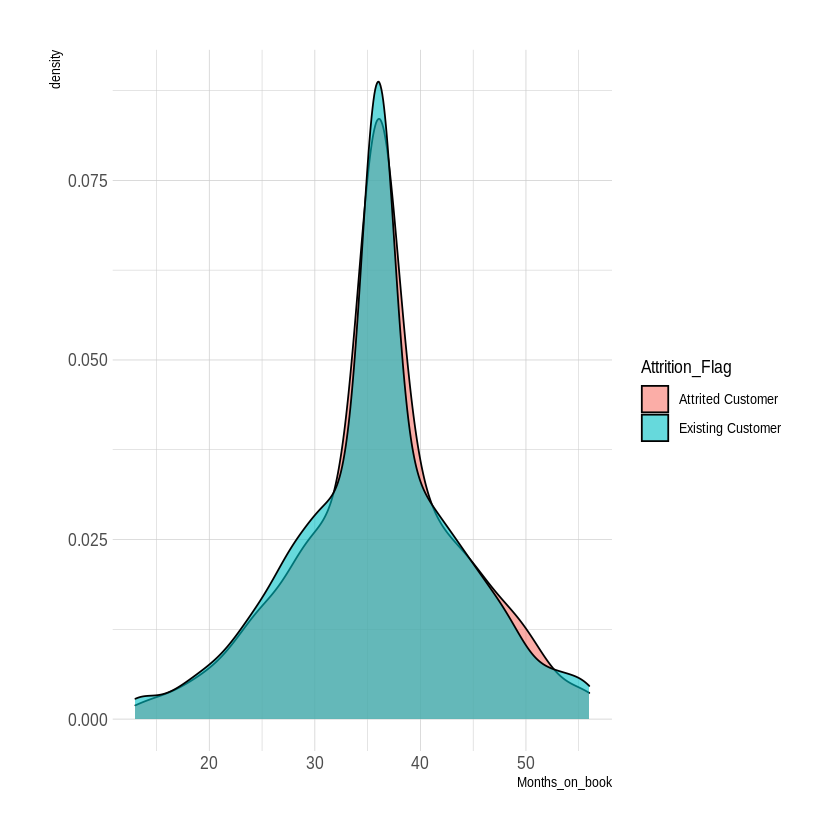

In [ ]:
ggplot(data=df, aes(x=Months_on_book, group=Attrition_Flag, fill=Attrition_Flag)) +
    geom_density(adjust=1.5, alpha=.6) +
    theme_ipsum()

Dari boxplot diatas, kita dapat melihat nilai pencilan pada keduanya, IQR existing customer yang lebih panjang, serta panjang boxplot keduanya hampir sama yang menandakan penyebaran data antara keduanya yang cenderung sama.

Hal ini diperkuat dengan density plot bahwa penyebaran nilai months on book pada keduanya cenderung sama dan membentuk suatu grafik yang cenderung simetris sehingga tidak menimbulkan kemencengan pada salah satu sisi. Density paling besar atau yang paling banyak muncul pada keduanya sama-sama pada nilai sekitar 36 dengan nilai density maksimum yang lebih besar pada existing customer.

# L. Attrition Flag dengan Credit Limit

Pertama, mari kita lihat deskripsi statistik dari data

In [ ]:
aggregate( Credit_Limit ~ Attrition_Flag, df, summary )

Attrition_Flag,Credit_Limit
<chr>,"<dbl[,6]>"
Attrited Customer,"1438.3, 2114, 4178.0, 8136.039, 9933.50, 34516"
Existing Customer,"1438.3, 2602, 4643.5, 8726.878, 11252.75, 34516"


Diatas telah terlampir nilai minimal, Q1, Q2/Median, Mean, Q3, dan nilai maksimal dari credit limit terhadap attrition flag secara berurutan

Dapat kita lihat bahwa mean dan median untuk credit limit dari attrited customer lebih kecil daripada existing customer. Kemudian, nilai minimal dari keduanya sama, dan nilai maksimalnya juga sama.

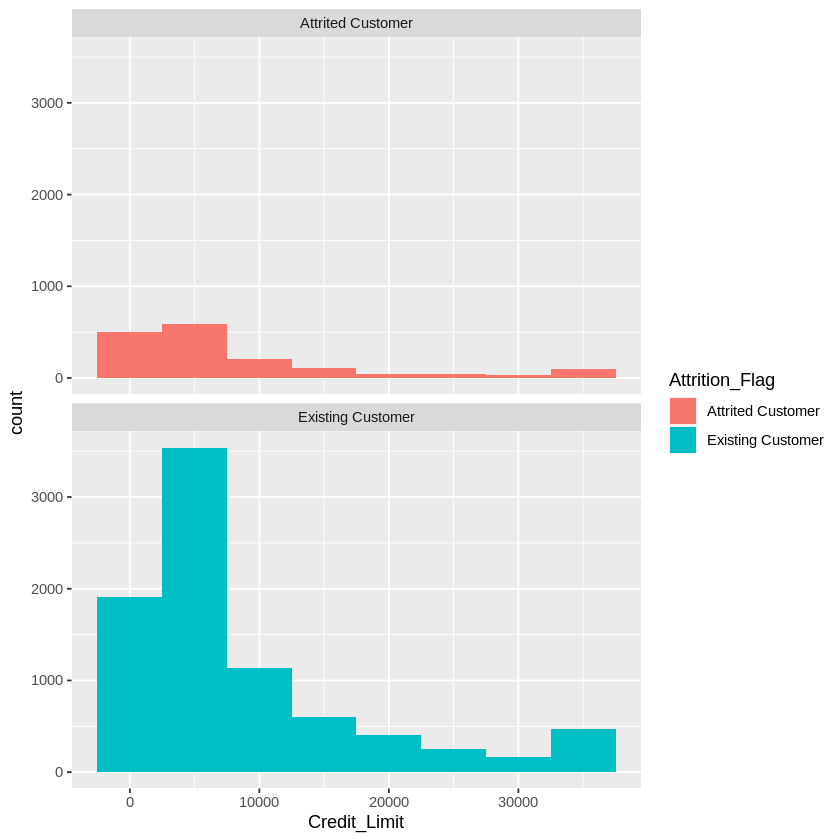

In [ ]:
ggplot(data=df, aes(x=Credit_Limit, fill=Attrition_Flag)) +
 geom_histogram(binwidth = 5000) +
 facet_wrap(~Attrition_Flag, ncol=1)

Pada histogram dengan interval 5000 tersebut, dapat kita lihat bahwa jumlah customer dengan credit limit antara 2500 sampai 7500 adalah yang terbanyak pada attrited dan existing customer. Sedangkan yang paling sedikit pada attrited dan existing customer adalah customer dengan credit limit antara 25700 sampai 32500.

Sekarang, kita bisa melihat penyebaran datanya menggunakan boxplot dan density plot.

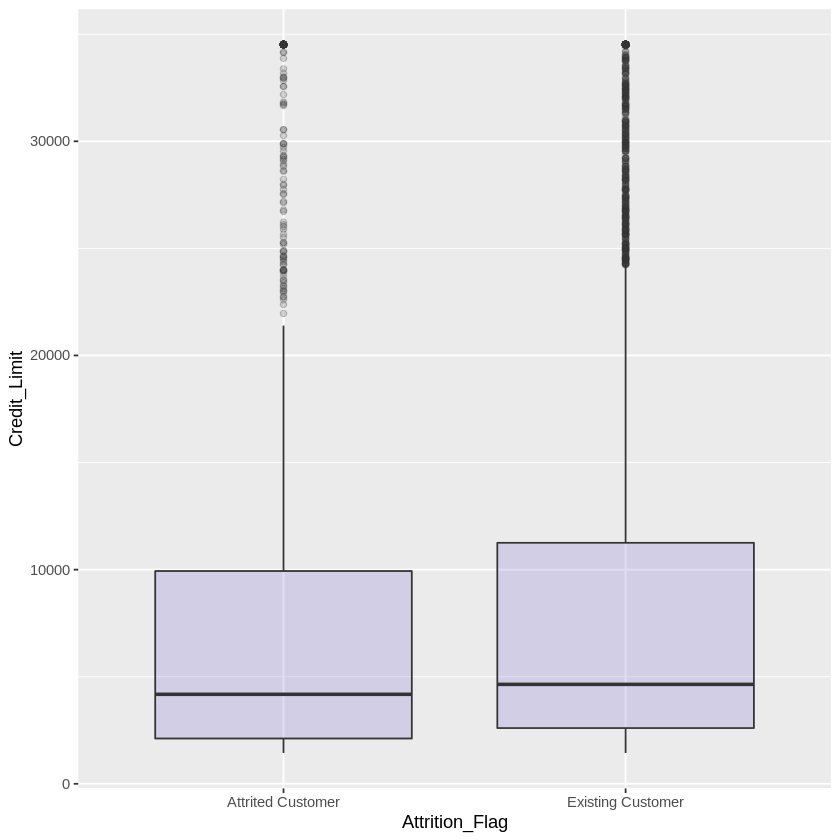

In [ ]:
ggplot(data=df, aes(x=Attrition_Flag , y=Credit_Limit)) + 
    geom_boxplot(fill="slateblue", alpha=0.2) 

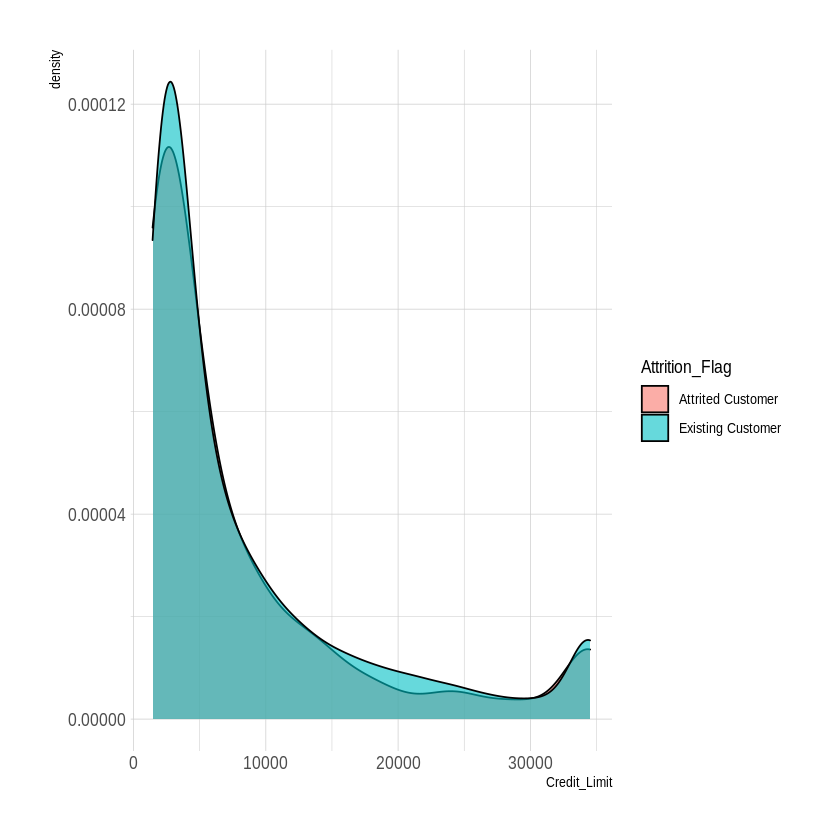

In [ ]:
ggplot(data=df, aes(x=Credit_Limit, group=Attrition_Flag, fill=Attrition_Flag)) +
    geom_density(adjust=1.5, alpha=.6) +
    theme_ipsum()

Dari boxplot diatas, kita dapat melihat nilai pencilan pada keduanya, IQR pada existing customer yang lebih panjang, serta panjang boxplot keduanya hampir sama yang menandakan penyebaran data antara keduanya yang cenderung sama.

Disamping itu, median pada keduanya lebih condong ke arah pagar dalam bawah yang menandakan terjadinya penumpukan data pada nilai yang lebih kecil dari median, sehingga menghasilkan kemiringan yang positif.

Hal ini diperkuat dengan density plot bahwa penyebaran nilai credit limit pada keduanya cenderung sama dan membentuk suatu grafik yang menceng ke arah kiri (positive skewness). Density paling besar atau yang paling banyak muncul pada keduanya sama-sama pada nilai sekitar 2500 dengan density maksimum pada existing customer yang lebih besar.

# M. Attrition Flag dengan Total Revolving Balance

Pertama, mari kita lihat deskripsi statistik dari data

In [ ]:
aggregate( Total_Revolving_Bal ~ Attrition_Flag, df, summary )

Attrition_Flag,Total_Revolving_Bal
<chr>,"<dbl[,6]>"
Attrited Customer,"0, 0, 0, 672.823, 1303.5, 2517"
Existing Customer,"0, 800, 1364, 1256.604, 1807.0, 2517"


Diatas telah terlampir nilai minimal, Q1, Q2/Median, Mean, Q3, dan nilai maksimal dari total revolving balance terhadap attrition flag secara berurutan.

Dapat kita lihat bahwa mean dan median untuk total revolving balance dari attrited customer lebih kecil daripada existing customer. Kemudian, nilai minimal dari keduanya sama, dan nilai maksimalnya juga sama

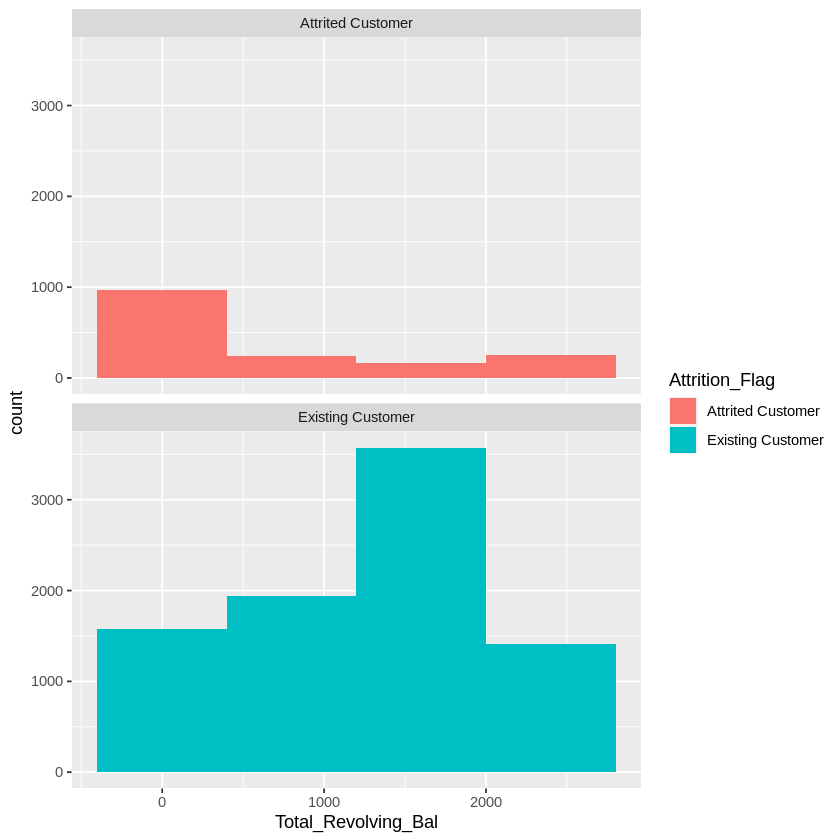

In [ ]:
ggplot(data=df, aes(x=Total_Revolving_Bal, fill=Attrition_Flag)) +
 geom_histogram(binwidth = 800) +
 facet_wrap(~Attrition_Flag, ncol=1)

Pada histogram dengan interval 800 tersebut, nilai total revolving balance terbanyak pada attrited customer berkisar antara 0 sampai 400. Sedangkan paling sedikitnya yaitu antara 1200 sampai 2000.

Sedangkan pada existing customer, jumlah customer dengan total revolving balance antara 1200 sampai 2000 merupakan yang terbanyak. Dan ini merupakan kebalikan dari attrited customer. Sedangkan jumlah  total revolving balance paling sedikit pada existing customer berkisar antara 2000 sampai 2800.





Sekarang, kita bisa melihat penyebaran datanya menggunakan boxplot dan density plot.

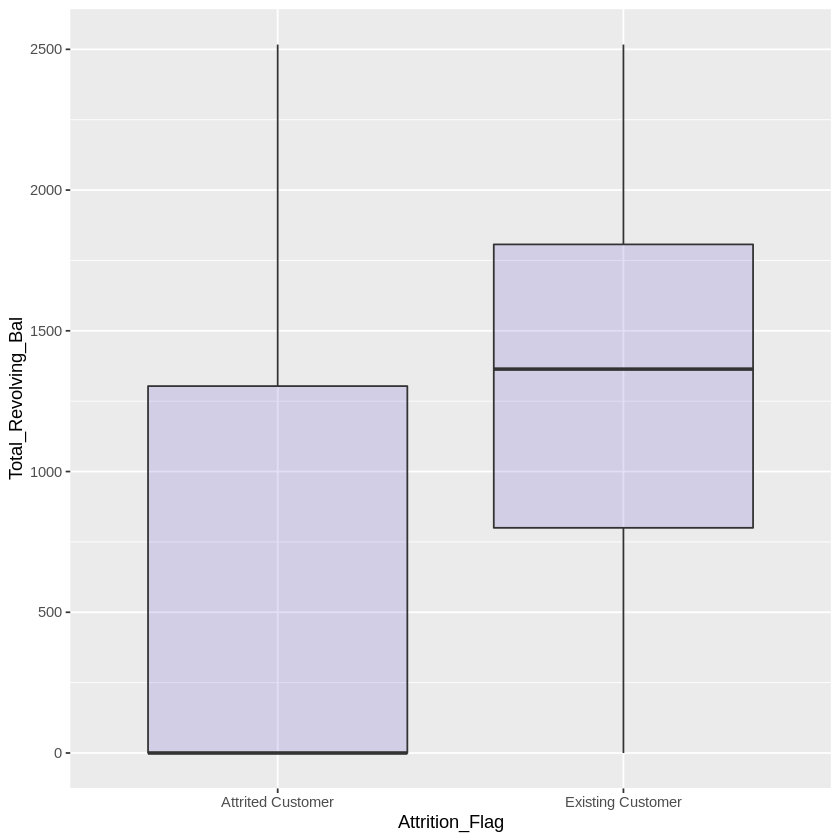

In [ ]:
ggplot(data=df, aes(x=Attrition_Flag , y=Total_Revolving_Bal)) + 
    geom_boxplot(fill="slateblue", alpha=0.2) 

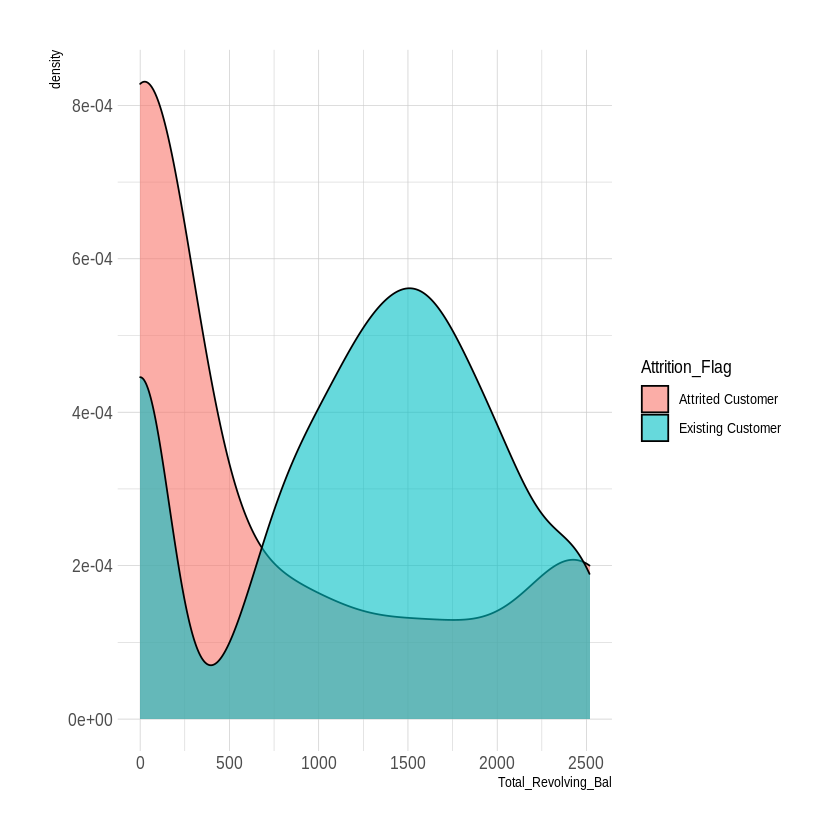

In [ ]:
ggplot(data=df, aes(x=Total_Revolving_Bal, group=Attrition_Flag, fill=Attrition_Flag)) +
    geom_density(adjust=1.5, alpha=.6) +
    theme_ipsum()

Dari boxplot diatas, kita tidak menjumpai nilai pencilan pada keduanya, IQR pada attrited customer yang lebih luas,  serta panjang boxplot keduanya sama yang menandakan penyebaran data antara keduanya yang sama.

Disamping itu, median pada attrited customer lebih condong ke arah pagar dalam bawah yang menandakan terjadinya penumpukan data pada nilai yang lebih kecil dari median, sehingga menghasilkan kemiringan yang positif. Sebaliknya, median pada existing customer lebih condong ke arah pagar dalam atas yang menandakan terjadinya penumpukan data pada nilai yang lebih besar dari median, sehingga menghasilkan kemiringan yang negatif.

Hal ini diperkuat dengan density plot bahwa daerah penyebaran nilai total revolving balance pada keduanya sama. Density maksimum pada attrited customer berada di sekitaran nilai total transaction count sebanyak 0, sedangkan pada existing customer berada di sekitaran 1500. Dan nilai density maksimum pada attrited customer lebih besar daripada existing customer.

# N. Attrition Flag dengan Average Open To Buy

Pertama, mari kita lihat deskripsi statistik dari data

In [ ]:
aggregate( Avg_Open_To_Buy ~ Attrition_Flag, df, summary )

Attrition_Flag,Avg_Open_To_Buy
<chr>,"<dbl[,6]>"
Attrited Customer,"3, 1587.0, 3488.0, 7463.216, 9257.50, 34516"
Existing Customer,"15, 1184.5, 3469.5, 7470.273, 9978.25, 34516"


Diatas telah terlampir nilai minimal, Q1, Q2/Median, Mean, Q3, dan nilai maksimal dari average open to buy terhadap attrition flag secara berurutan.

Dapat kita lihat bahwa mean untuk average open to buy dari attrited customer lebih kecil daripada existing customer, tetapi median dari attrited customer lebih besar daripada existing customer. Hal ini mungkin terjadi karena adanya faktor nilai pencilan. Kemudian, nilai minimal dari attrited customer lebih kecil, dan nilai maksimalnya sama.

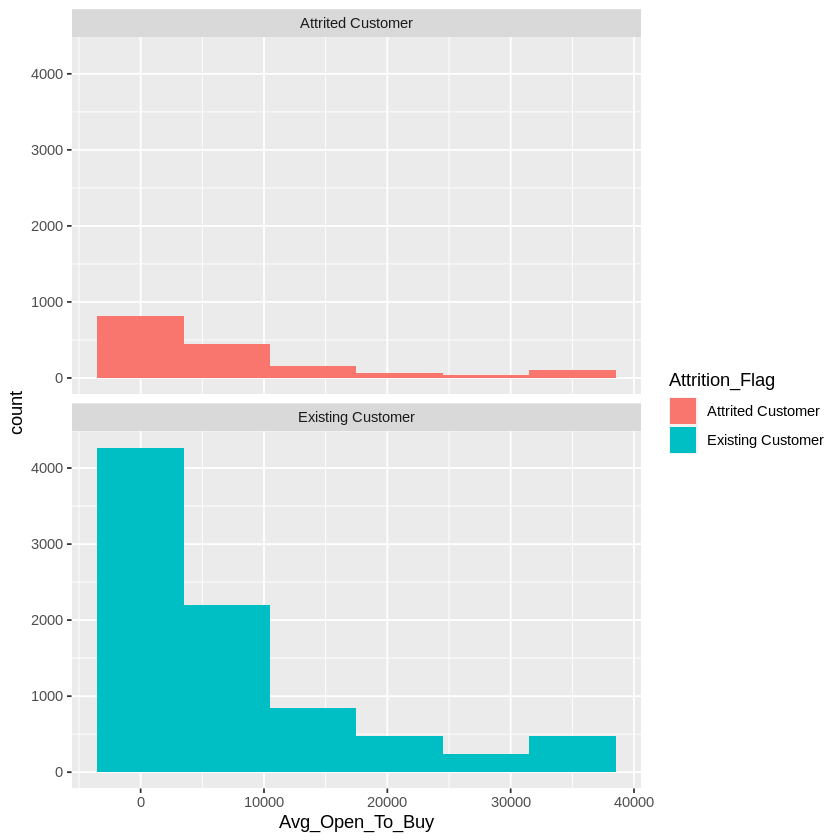

In [ ]:
ggplot(data=df, aes(x=Avg_Open_To_Buy, fill=Attrition_Flag)) +
 geom_histogram(binwidth = 7000) +
 facet_wrap(~Attrition_Flag, ncol=1)

Pada histogram dengan interval 7000 tersebut, dapat kita lihat bahwa jumlah customer dengan average open to buy antara 0 sampai 3000 adalah yang terbanyak pada attrited dan existing customer. Sedangkan yang paling sedikit pada attrited dan existing customer adalah customer dengan average open to buy antara 24000 sampai 31000.

Sekarang, kita bisa melihat penyebaran datanya menggunakan boxplot dan density plot.

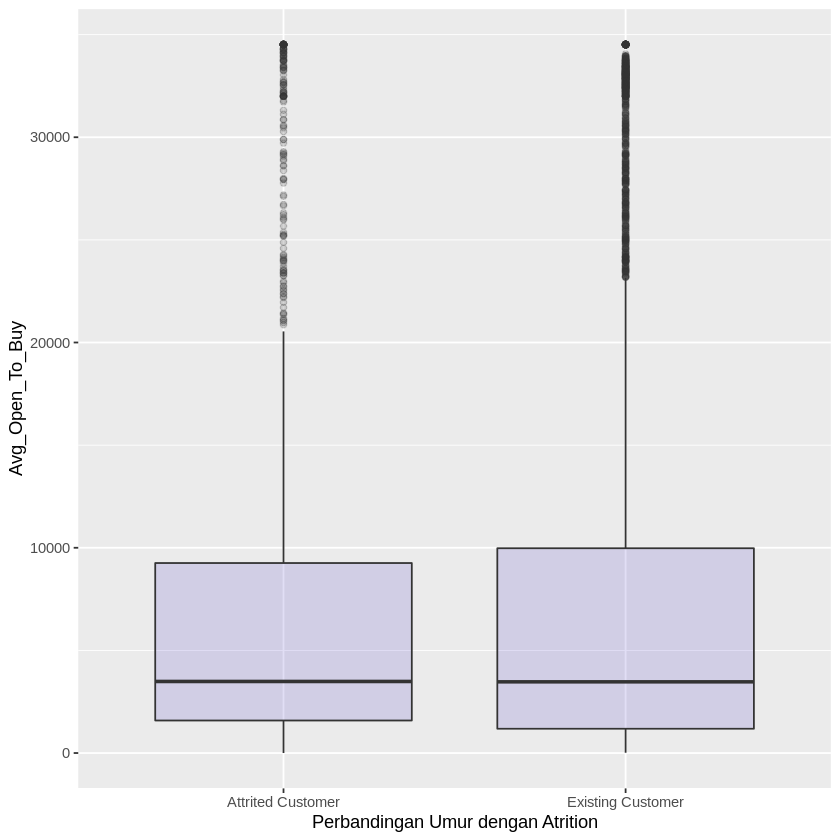

In [ ]:
ggplot(data=df, aes(x=Attrition_Flag , y=Avg_Open_To_Buy)) + 
    geom_boxplot(fill="slateblue", alpha=0.2) + 
    xlab("Perbandingan Umur dengan Atrition")

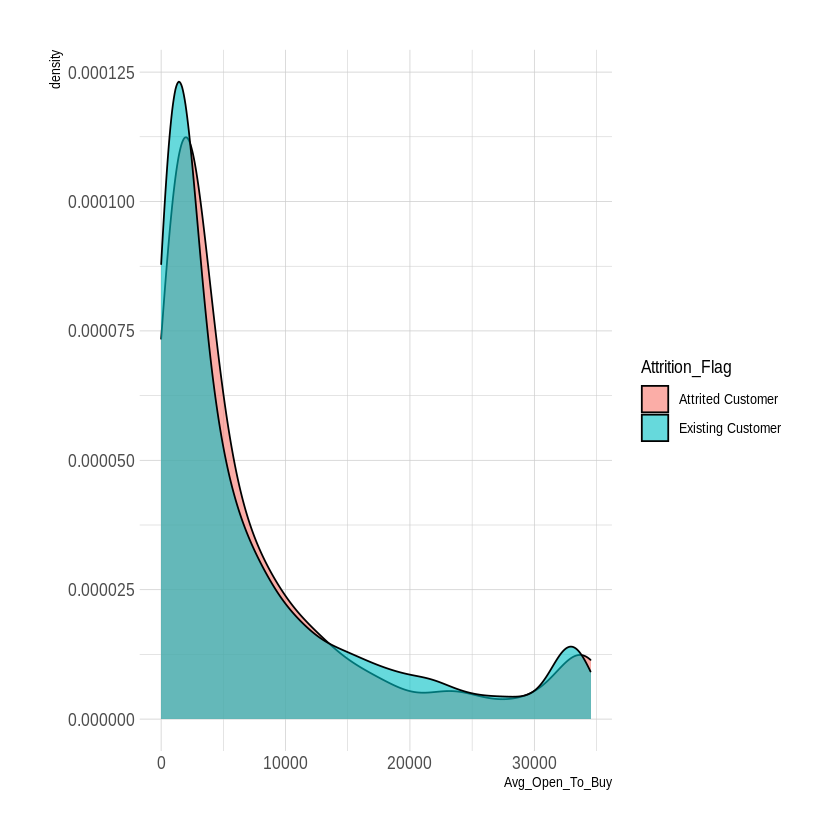

In [ ]:
ggplot(data=df, aes(x=Avg_Open_To_Buy, group=Attrition_Flag, fill=Attrition_Flag)) +
    geom_density(adjust=1.5, alpha=.6) +
    theme_ipsum()

Dari boxplot diatas, kita dapat melihat nilai pencilan pada keduanya, IQR pada existing customer yang lebih luas, serta panjang boxplot keduanya hampir sama yang menandakan penyebaran data antara keduanya yang cenderung sama.

Disamping itu, median keduanya lebih condong ke arah pagar dalam bawah yang menandakan terjadinya penumpukan data pada nilai yang lebih kecil dari median, sehingga menghasilkan kemiringan yang positif.

Hal ini diperkuat dengan density plot bahwa daerah penyebaran nilai average open to buy pada keduanya sama, dan sama-sama membentuk grafik yang menceng ke kiri (positive skewness). Density maksimum pada attrited customer dan existing customer berada di sekitaran nilai 2000. Dan nilai density maksimum pada existing customer lebih besar daripada attrited customer.


# O. Attrition Flag dengan Total Amount Change Q4 sampai Q1

Pertama, mari kita lihat deskripsi statistik dari data

In [ ]:
aggregate( Total_Amt_Chng_Q4_Q1 ~ Attrition_Flag, df, summary )

Attrition_Flag,Total_Amt_Chng_Q4_Q1
<chr>,"<dbl[,6]>"
Attrited Customer,"0.000, 0.5445, 0.701, 0.6942766, 0.856, 1.492"
Existing Customer,"0.256, 0.6430, 0.743, 0.7725095, 0.860, 3.397"


Diatas telah terlampir nilai minimal, Q1, Q2/Median, Mean, Q3, dan nilai maksimal dari total amount change pada Q4 sampai Q1 terhadap attrition flag secara berurutan.

Dapat kita lihat bahwa mean dan median untuk Total Perubahan Jumlah Nominal Quartil 1 sampai 4 dari attrited customer lebih kecil daripada existing customer. Kemudian, nilai minimal dari attrited customer lebih kecil, begitu pula dengan nilai maksimalnya.

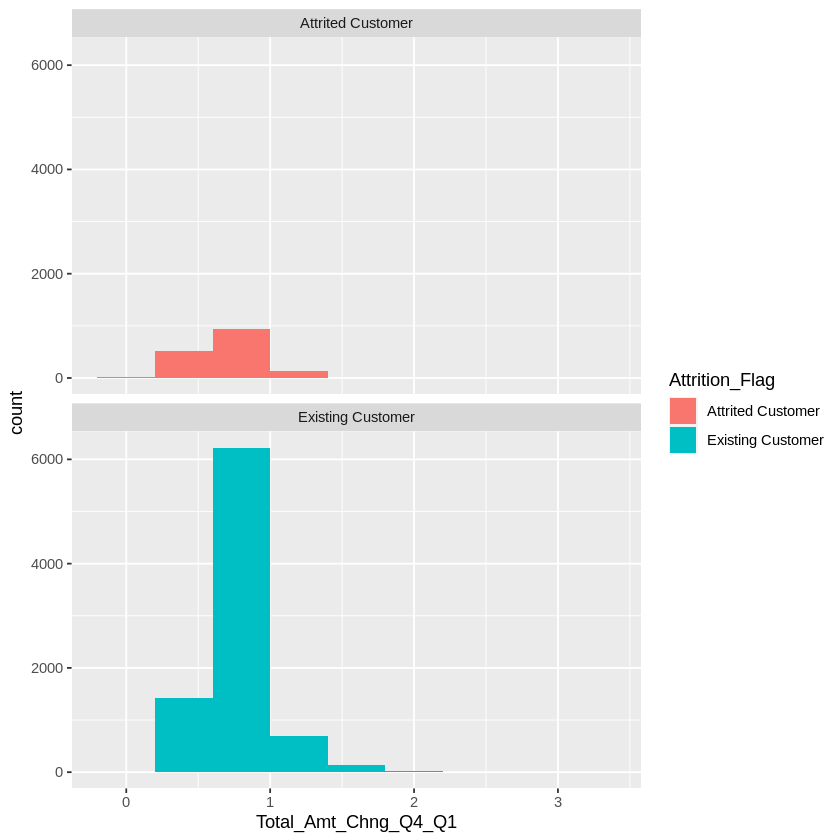

In [ ]:
ggplot(data=df, aes(x=Total_Amt_Chng_Q4_Q1, fill=Attrition_Flag)) +
 geom_histogram(binwidth = 0.4) +
 facet_wrap(~Attrition_Flag, ncol=1)

Pada histogram dengan interval 0,4 tersebut, dapat kita lihat bahwa jumlah customer dengan total amount change pada Q4 sampai Q1 berkisar antara 0,6 sampai 1 adalah yang terbanyak pada attrited dan existing customer. Sedangkan jumlah attrited customer dengan total amount change antara Q4 sampai Q1 berkisar antara 0 sampai 0,2 adalah yang paling sedikit. Sebaliknya, jumlah existing customer dengan total amount change antara Q4 sampai Q1 berkisar antara 1,8 sampai 2,2 adalah yang paling sedikit.

Sekarang, kita bisa melihat penyebaran datanya menggunakan boxplot dan density plot.

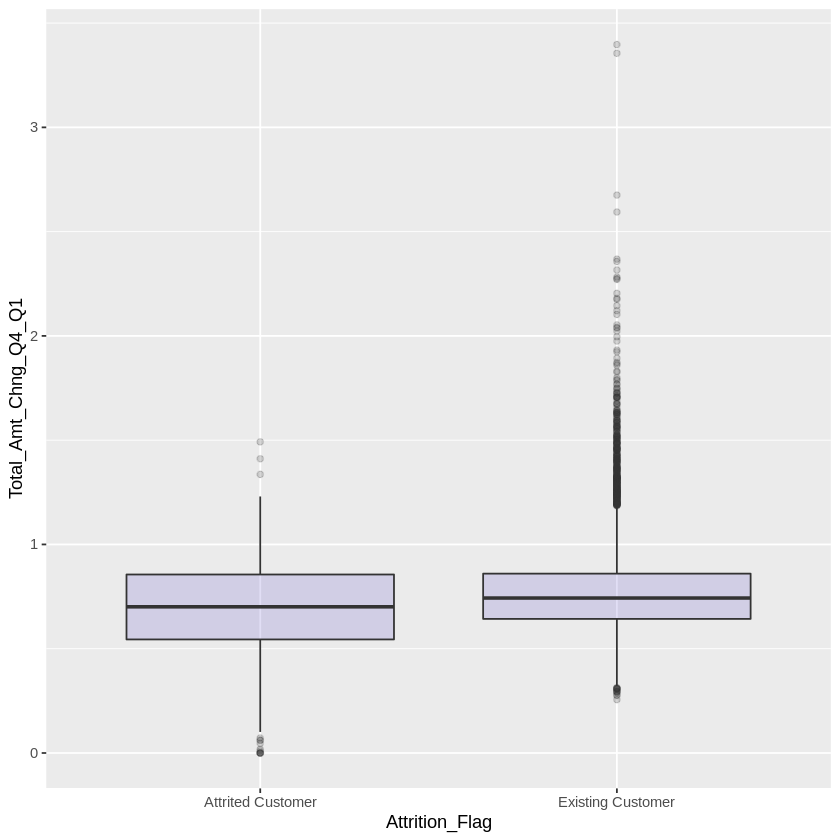

In [ ]:
ggplot(data=df, aes(x=Attrition_Flag , y=Total_Amt_Chng_Q4_Q1)) + 
    geom_boxplot(fill="slateblue", alpha=0.2)

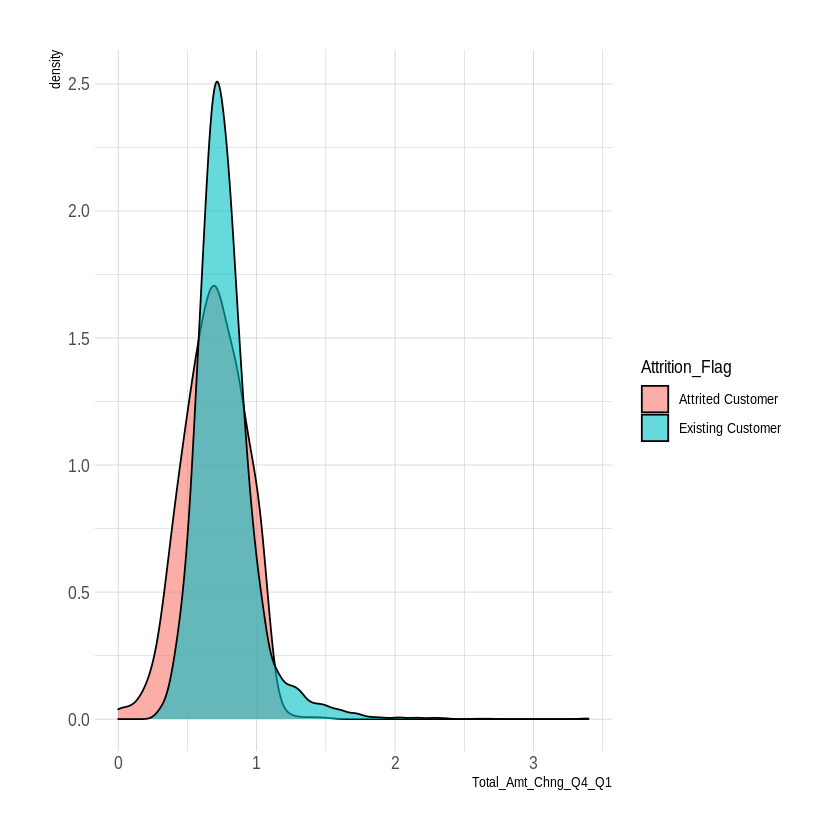

In [ ]:
ggplot(data=df, aes(x=Total_Amt_Chng_Q4_Q1, group=Attrition_Flag, fill=Attrition_Flag)) +
    geom_density(adjust=1.5, alpha=.6) +
    theme_ipsum()

Dari boxplot diatas, kita dapat melihat nilai pencilan pada keduanya,dan IQR pada attrited customer yang lebih luas. Boxplot dari attrited customer lebih panjang daripada existing customer. Jika kita mengabaikan nilai pencilan, maka data pada attrited customer lebih menyebar daripada existing customer. Tetapi, jika kita memperhitungkan nilai pencilan, maka data pada existing customer lah yang lebih menyebar. Disamping itu, letak median pada keduanya juga cenderung simetris.

Dari density plot bisa kita ketahui bahwa density maksimum pada attrited customer berada di sekitaran nilai otal amount change dari Q4 sampai Q1 adalah 0.6, sedangkan pada existing customer berada di sekitaran 0.65. Dan nilai density maksimum pada existing customer lebih besar daripada attrited customer.

# P. Attrition Flag dengan Total Transaction Amount

Pertama, mari kita lihat deskripsi statistik dari data.

In [ ]:
aggregate( Total_Trans_Amt ~ Attrition_Flag, df, summary )

Attrition_Flag,Total_Trans_Amt
<chr>,"<dbl[,6]>"
Attrited Customer,"510, 1903.50, 2329, 3095.026, 2772.00, 10583"
Existing Customer,"816, 2384.75, 4100, 4654.656, 4781.25, 18484"


Diatas telah terlampir nilai minimal, Q1, Q2/Median, Mean, Q3, dan nilai maksimal dari total transaction amount pada Q4 sampai Q1 terhadap attrition flag secara berurutan.

Dapat kita lihat bahwa mean dan median untuk total transaction amount dari attrited customer lebih kecil daripada existing customer. Kemudian, nilai minimal dari attrited customer lebih kecil, begitu pula dengan nilai maksimalnya.

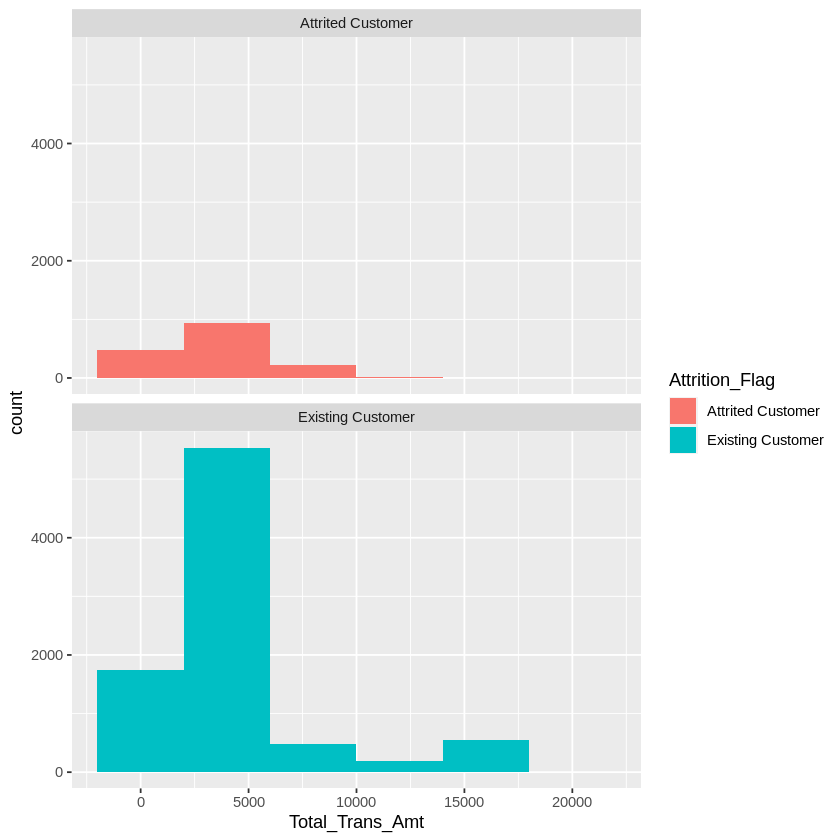

In [ ]:
ggplot(data=df, aes(x=Total_Trans_Amt, fill=Attrition_Flag)) +
 geom_histogram(binwidth = 4000) +
 facet_wrap(~Attrition_Flag, ncol=1) 

Pada histogram dengan interval 4000 tersebut, dapat kita lihat bahwa jumlah customer dengan total transaction amount berkisar antara 2000 sampai 6000 adalah yang terbanyak pada attrited dan existing customer. Sedangkan yang paling sedikit pada attrited dan existing customer adalah customer dengan total transaction amount antara 10000 sampai 14000.

Sekarang, kita bisa melihat penyebaran datanya menggunakan boxplot dan density plot.

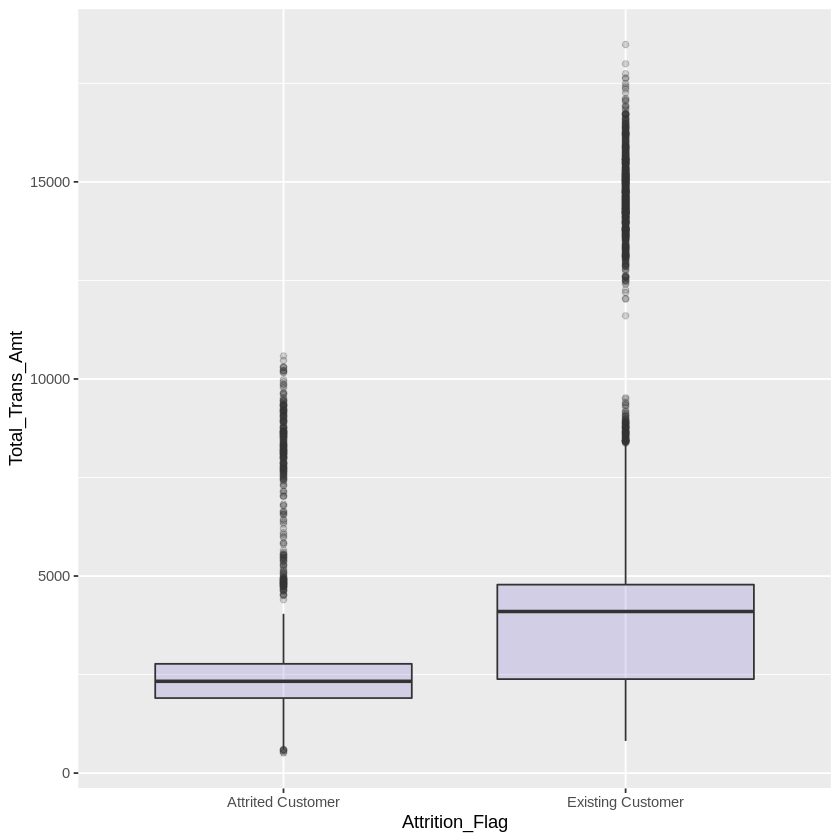

In [ ]:
ggplot(data=df, aes(x=Attrition_Flag , y=Total_Trans_Amt)) + 
    geom_boxplot(fill="slateblue", alpha=0.2)

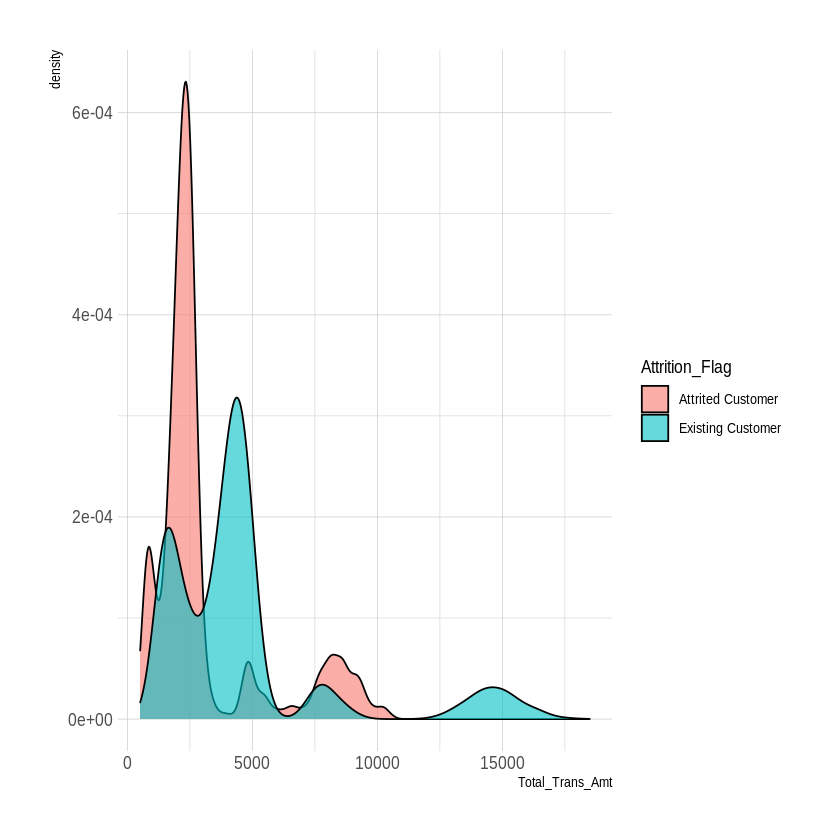

In [ ]:
ggplot(data=df, aes(x=Total_Trans_Amt, group=Attrition_Flag, fill=Attrition_Flag)) +
    geom_density(adjust=1.5, alpha=.6) +
    theme_ipsum()

Dari boxplot diatas, kita dapat melihat nilai pencilan pada keduanya, dan IQR pada existing customer yang lebih luas. Boxplot dari existing customer lebih panjang daripada attrited customer. Hal ini menandakan bahwa data lebih menyebar pada existing customer.

Disamping itu, letak median pada attrited customer cenderung simetris. Sebaliknya, median pada existing customer lebih condong ke arah pagar dalam atas yang menandakan terjadinya penumpukan data pada nilai yang lebih besar dari median, sehingga menghasilkan kemiringan yang negatif.

Dari density plot dapat kita lihat bahwa penyebaran nilai total transaction amount pada keduanya tidak merata. Daerah penyebaran nilai pada existing customer adalah yang lebih luas. Density maksimum pada attrited customer berada di sekitaran nilai 2500, sedangkan pada existing customer berada di sekitaran 4200. Dan nilai density maksimum pada attrited customer lebih besar daripada existing customer.

# Q. Attrition Flag dengan Total Transaction Count

Pertama, mari kita lihat deskripsi statistik dari data.

In [ ]:
aggregate( Total_Trans_Ct ~ Attrition_Flag, df, summary)

Attrition_Flag,Total_Trans_Ct
<chr>,"<dbl[,6]>"
Attrited Customer,"10, 37, 43, 44.93362, 51, 94"
Existing Customer,"11, 54, 71, 68.67259, 82, 139"


Diatas telah terlampir nilai minimal, Q1, Q2/Median, Mean, Q3, dan nilai maksimal dari total transaction count pada Q4 sampai Q1 terhadap attrition flag secara berurutan.

Dapat kita lihat bahwa mean dan median untuk total transaction count dari attrited customer lebih kecil daripada existing customer. Kemudian, nilai minimal dari attrited customer lebih kecil, begitu pula dengan nilai maksimalnya.

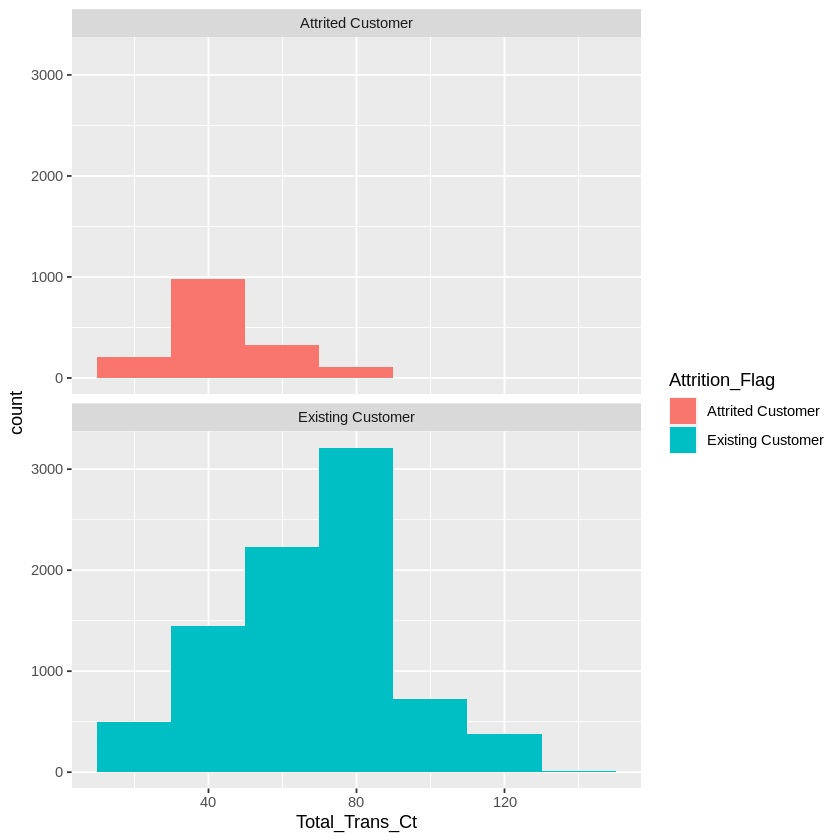

In [ ]:
ggplot(data=df, aes(x=Total_Trans_Ct, fill=Attrition_Flag)) +
 geom_histogram(binwidth = 20) +
 facet_wrap(~Attrition_Flag, ncol=1)

Pada histogram dengan interval 20 tersebut, customer dengan total transaction count 70 sampai 90 kali adalah yang terbanyak pada existing customer, tapi paling sedikit pada attrited customer. Sedangkan yang paling banyak pada attrited customer adalah total transaction count sebanyak 30 sampai 50 kali. Dan yang paling sedikit pada existing customer adalah total transaction count sebanyak 130 sampai 150.

Sekarang, kita bisa melihat penyebaran datanya menggunakan boxplot dan density plot.

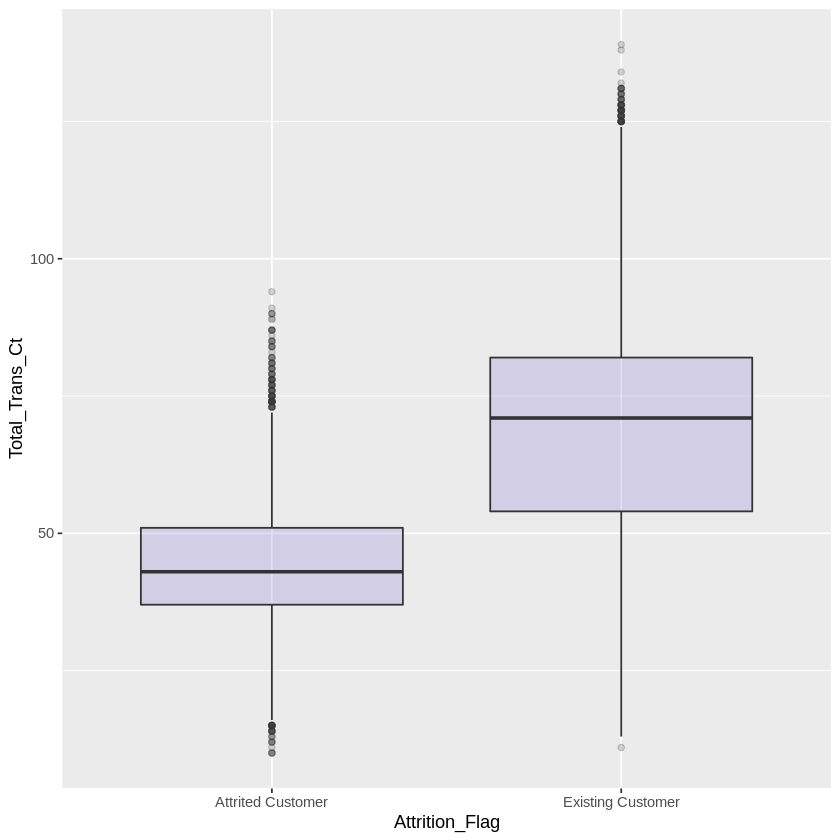

In [ ]:
ggplot(data=df, aes(x=Attrition_Flag , y=Total_Trans_Ct)) + 
    geom_boxplot(fill="slateblue", alpha=0.2) 

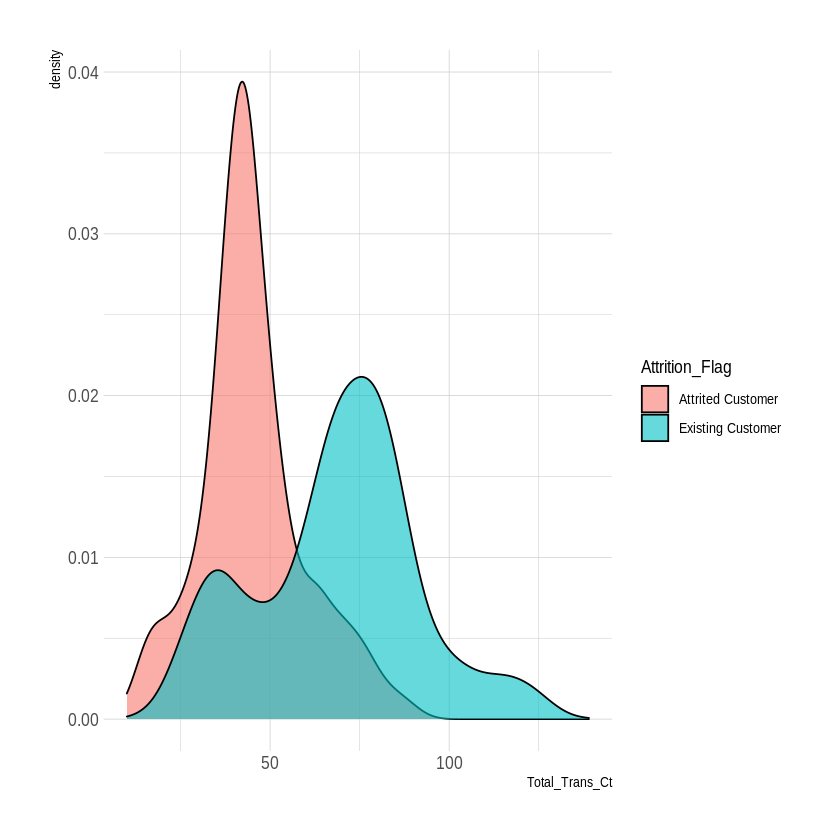

In [ ]:
ggplot(data=df, aes(x=Total_Trans_Ct, group=Attrition_Flag, fill=Attrition_Flag)) +
    geom_density(adjust=1.5, alpha=.6) +
    theme_ipsum()

Dari boxplot diatas, kita dapat melihat nilai pencilan pada keduanya, dan IQR pada attrited customer yang lebih luas. Boxplot dari existing customer lebih panjang daripada attrited customer. Hal ini menandakan bahwa data lebih menyebar pada existing customer.

Disamping itu, median pada attrited customer lebih condong ke arah pagar dalam bawah yang menandakan terjadinya penumpukan data pada nilai yang lebih kecil dari median, sehingga menghasilkan kemiringan yang positif. Sebaliknya, median pada existing customer lebih condong ke arah pagar dalam atas yang menandakan terjadinya penumpukan data pada nilai yang lebih besar dari median, sehingga menghasilkan kemiringan yang negatif.

Dari density plot kita dapat mengetahui lebih jelas bahwa existing customer memiliki penyebaran data yang lebih luas daripada attrited customer. Density maksimum pada attrited customer berada di sekitaran nilai total transaction count sekitar 40, sedangkan pada existing customer berada di sekitaran 75. Dan nilai density maksimum pada attrited customer lebih besar daripada existing customer.

# R. Attrition Flag dengan Total Count Change Q4 over Q1

Pertama, mari kita lihat deskripsi statistik dari data.

In [ ]:
aggregate( Total_Ct_Chng_Q4_Q1 ~ Attrition_Flag, df, summary)

Attrition_Flag,Total_Ct_Chng_Q4_Q1
<chr>,"<dbl[,6]>"
Attrited Customer,"0.000, 0.400, 0.531, 0.5543860, 0.692, 2.500"
Existing Customer,"0.028, 0.617, 0.721, 0.7424341, 0.833, 3.714"


Diatas telah terlampir nilai minimal, Q1, Q2/Median, Mean, Q3, dan nilai maksimal dari Total Count Change Q4 sampai Q1 terhadap attrition flag secara berurutan.

Dapat kita lihat bahwa mean dan median untuk Total Count Change Q4 sampai Q1 dari attrited customer lebih kecil daripada existing customer. Kemudian, nilai minimal dari attrited customer lebih kecil, begitu pula dengan nilai maksimalnya.

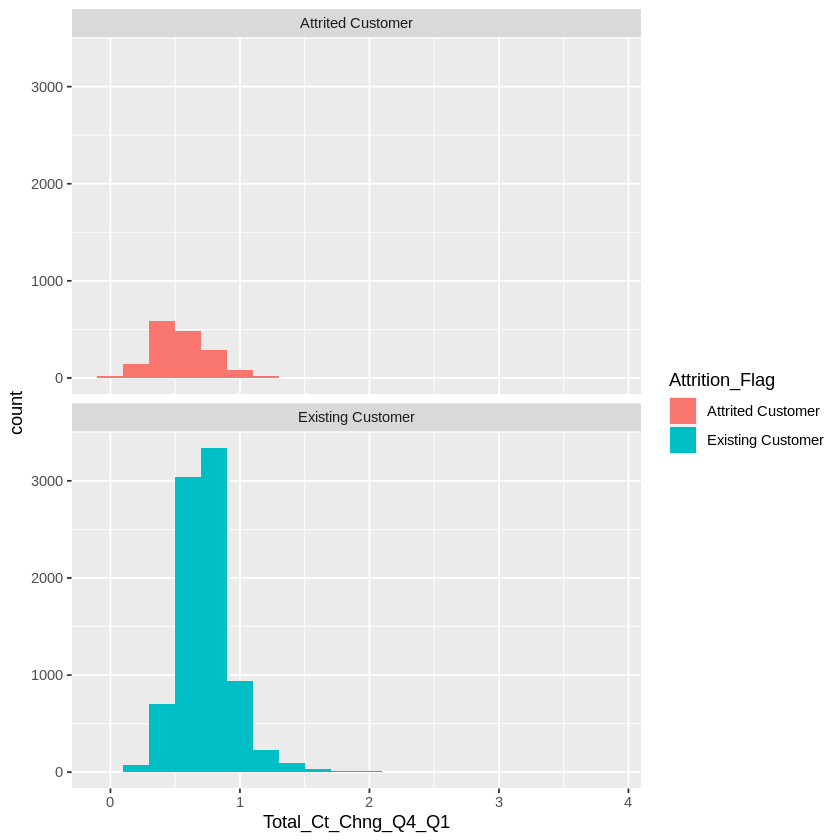

In [ ]:
ggplot(data=df, aes(x= Total_Ct_Chng_Q4_Q1, fill=Attrition_Flag)) +
 geom_histogram(binwidth = 0.2) +
 facet_wrap(~Attrition_Flag, ncol=1)

Pada histogram dengan interval 0,2 tersebut, dapat kita lihat bahwa jumlah customer dengan Total Count Change Q4 sampai Q1 berkisar antara 0,3 sampai 0,5 adalah yang terbanyak pada attrited customer. Sedangkan jumlah terbanyak pada existing customer berada antara 0,9 sampai 1,1. Dan jumlah Total Count Change Q4 sampai Q1 paling sedikit pada existing customer adalah 1,7 sampai 2,1.

Sekarang, kita bisa melihat penyebaran datanya menggunakan boxplot dan density plot.

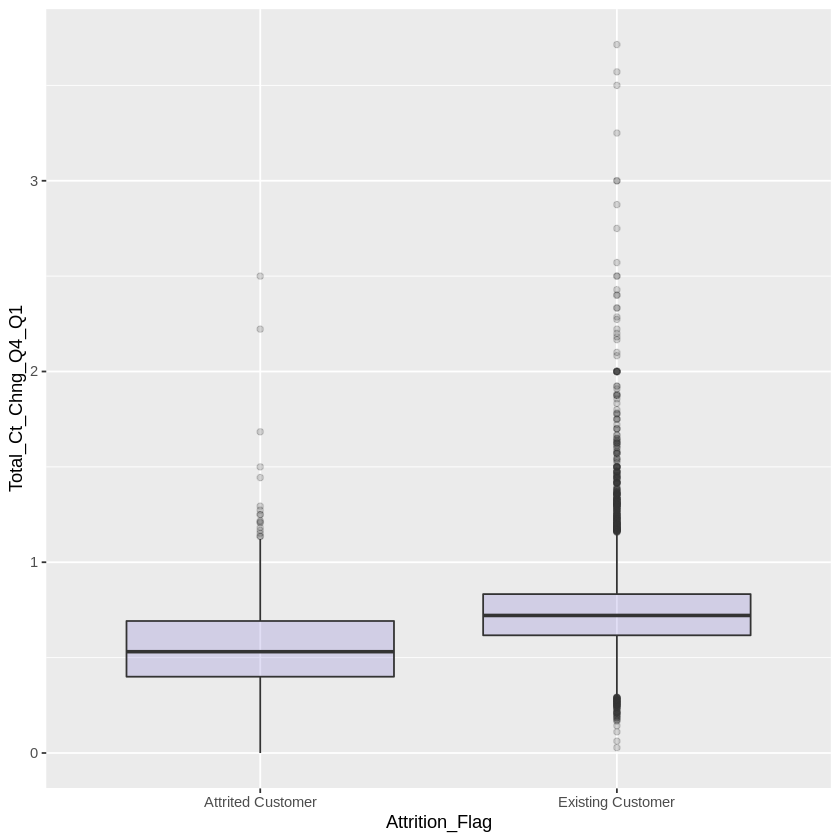

In [ ]:
ggplot(data=df, aes(x=Attrition_Flag , y=Total_Ct_Chng_Q4_Q1)) + 
    geom_boxplot(fill="slateblue", alpha=0.2) 

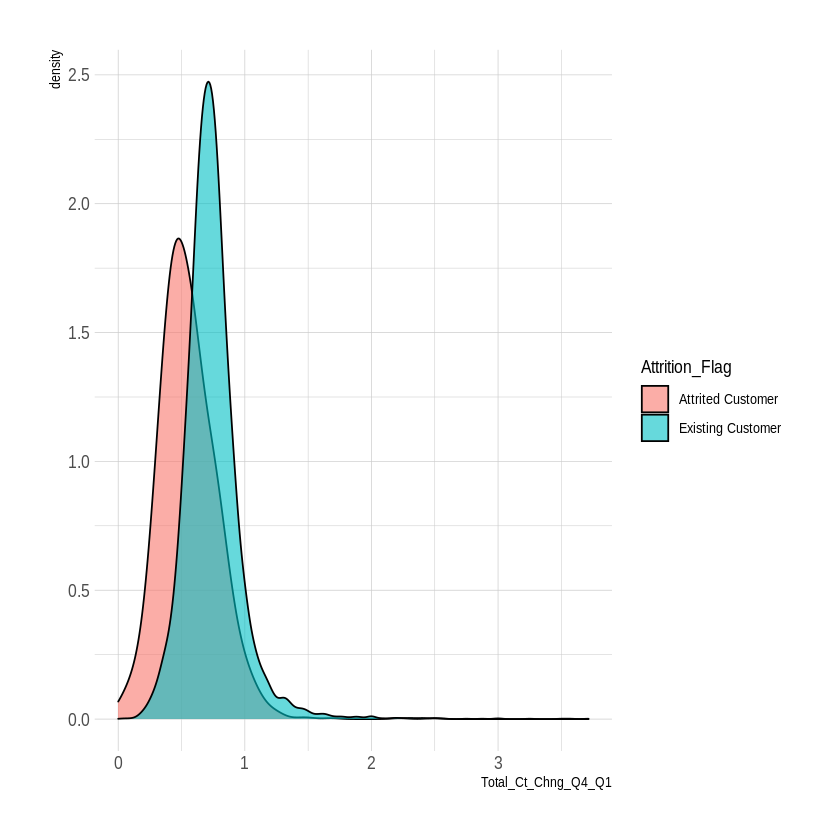

In [ ]:
ggplot(data=df, aes(x=Total_Ct_Chng_Q4_Q1, group=Attrition_Flag, fill=Attrition_Flag)) +
    geom_density(adjust=1.5, alpha=.6) +
    theme_ipsum()

Dari boxplot diatas, kita dapat melihat nilai pencilan pada keduanya, dan IQR pada attrited customer yang lebih luas. Boxplot dari attrited customer lebih panjang daripada existing customer. Jika kita mengabaikan nilai pencilan, maka data pada attrited customer lebih menyebar pada existing customer. Tetapi, jika kita memperhitungkan nilai pencilan, maka data pada existing customer lah yang lebih menyebar. Disamping itu, letak median pada keduanya cenderung simetris, sehingga tidak terjadi penumpukan yang sangat signifikan.

Dari density plot bisa kita ketahui bahwa density maksimum pada attrited customer berada di sekitaran nilai Total Count Change Q4 sampai Q1 sebanyak 0.5, sedangkan pada existing customer berada di sekitaran 0.7. Dan nilai density maksimum pada existing customer lebih besar daripada attrited customer.


# S. Attrition Flag dengan Average Utilization Ratio

Pertama, mari kita lihat deskripsi statistik dari data.

In [ ]:
aggregate( Avg_Utilization_Ratio ~ Attrition_Flag, df, summary)

Attrition_Flag,Avg_Utilization_Ratio
<chr>,"<dbl[,6]>"
Attrited Customer,"0, 0.000, 0.000, 0.1624751, 0.23100, 0.999"
Existing Customer,"0, 0.055, 0.211, 0.2964118, 0.52925, 0.994"


Diatas telah terlampir nilai minimal, Q1, Q2/Median, Mean, Q3, dan nilai maksimal dari average utilization ratio terhadap attrition flag secara berurutan.

Dapat kita lihat bahwa mean dan median untuk average utilization ratio dari attrited customer lebih kecil daripada existing customer. Kemudian, nilai minimal dari keduanya sama, dan nilai maksimal dari attrited customer yang lebih besar.

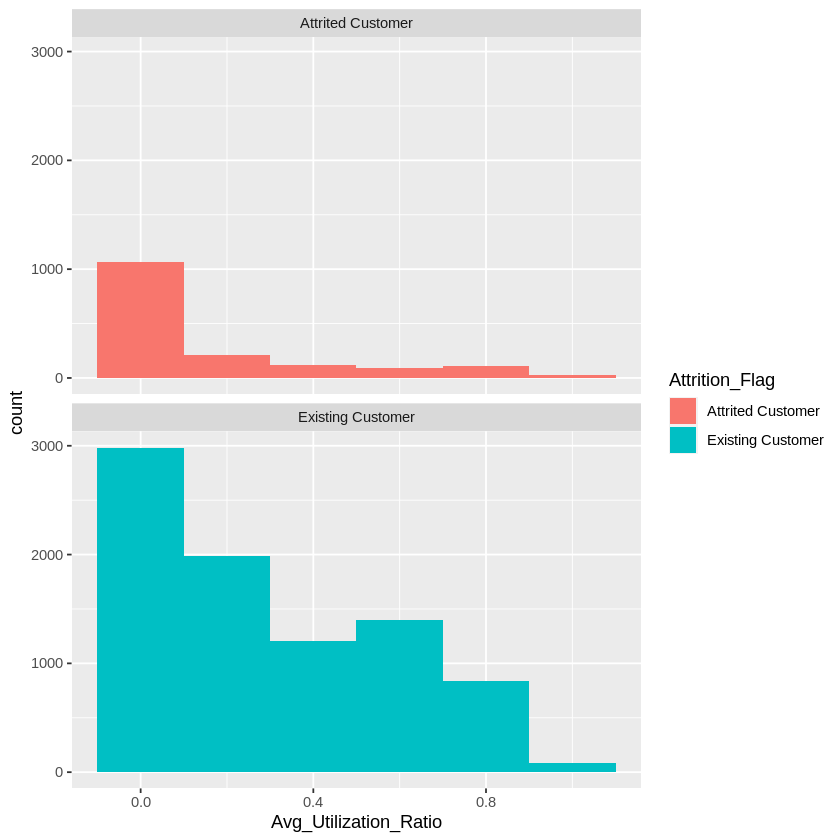

In [ ]:
ggplot(data=df, aes(x= Avg_Utilization_Ratio, fill=Attrition_Flag)) +
 geom_histogram(binwidth = 0.2) +
 facet_wrap(~Attrition_Flag, ncol=1)

Pada histogram dengan interval 0,2 tersebut, dapat kita lihat bahwa jumlah customer dengan average utilization ratio berkisar antara 0 sampai 0,1 adalah yang terbanyak pada attrited customer dan existing customer. Sedangkan yang paling sedikit pada attrited dan existing customer adalah customer dengan average utilization ratio lebih besar dari 0,9.

Sekarang, kita bisa melihat penyebaran datanya menggunakan boxplot dan density plot.

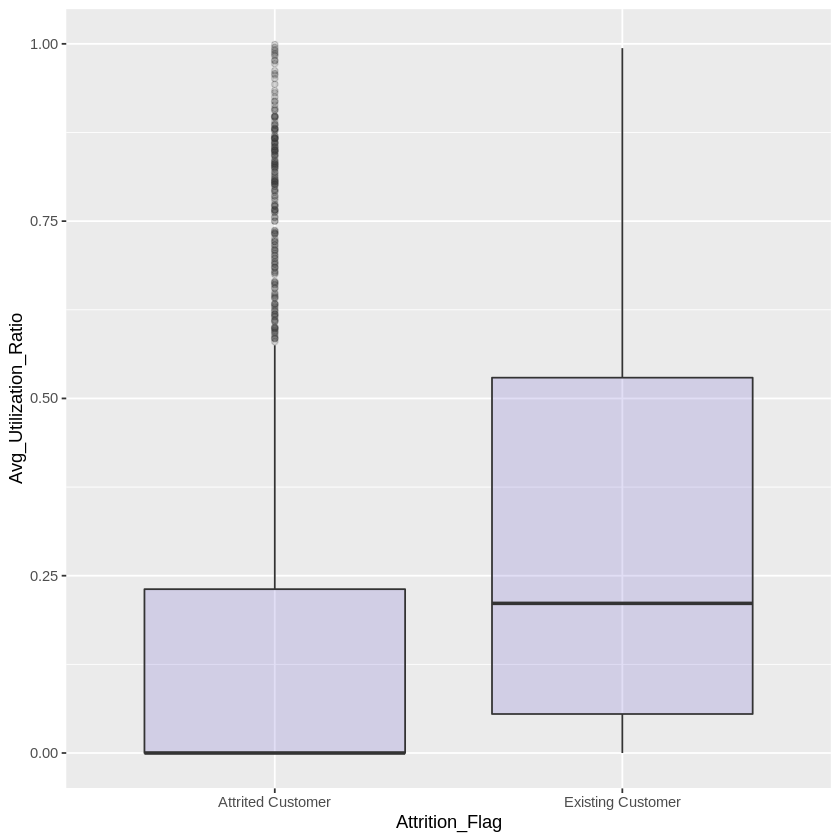

In [ ]:
ggplot(data=df, aes(x=Attrition_Flag , y=Avg_Utilization_Ratio)) + 
    geom_boxplot(fill="slateblue", alpha=0.2) 

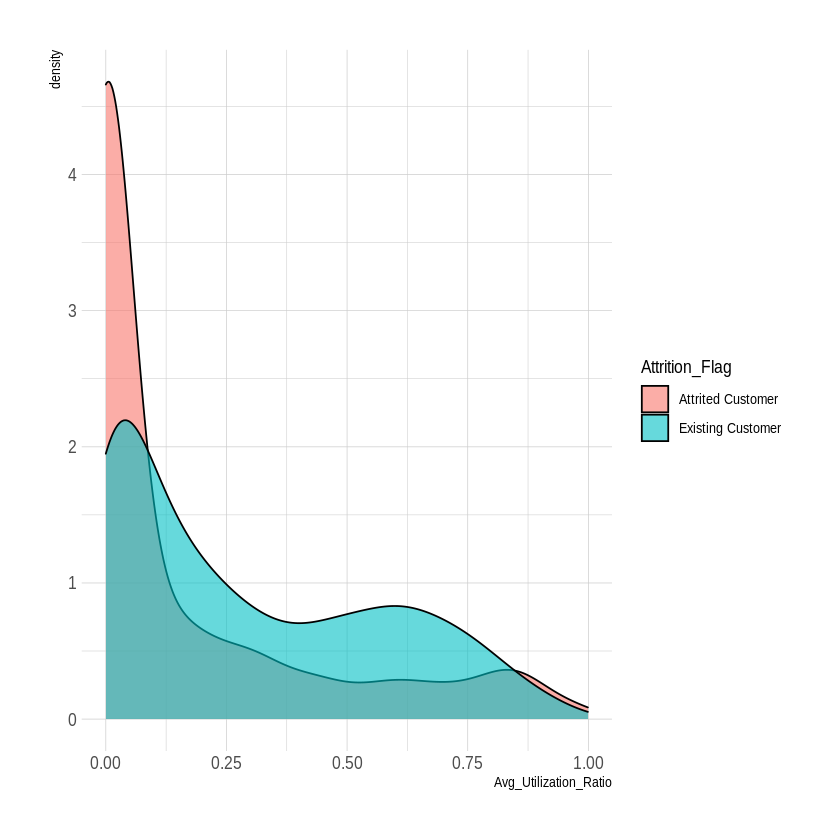

In [ ]:
ggplot(data=df, aes(x=Avg_Utilization_Ratio, group=Attrition_Flag, fill=Attrition_Flag)) +
    geom_density(adjust=1.5, alpha=.6) +
    theme_ipsum()

Dari boxplot diatas, kita dapat melihat nilai pencilan pada attrited customer, dan IQR pada existing customer yang lebih luas. Boxplot dari existing customer lebih panjang daripada attrited customer. Jika kita mengabaikan nilai pencilan, maka data pada existing customer lebih menyebar pada attrited customer. Tetapi, jika kita memperhitungkan nilai pencilan, penyebaran data pada keduanya adalahs sama.

Disamping itu, median keduanya lebih condong ke arah pagar dalam bawah yang menandakan terjadinya penumpukan data pada nilai yang lebih kecil dari median, sehingga menghasilkan kemiringan yang positif.

Dari density plot bisa kita ketahui bahwa penyebaran data pada keduanya sama. Density maksimum pada attrited customer berada di sekitaran nilai average utilization ratio 0, sedangkan pada existing customer berada di sekitaran 0.06. Dan nilai density maksimum pada attrited customer lebih besar daripada existing customer

# 5. Hubungan Antar Variabel Numerik

Setelah kita melakukan eksplorasi data, dan telah menemukan sedikit gambaran tentang data tersebut. Maka sekarang yang akan kita lakukan yaitu menganalisis hubungan antara dua variabel pada data tersebut. Nanti kita bisa memutuskan apakah antara kedua variabel tersebut memiliki hubungan atau tidak dan bagaimana korelasinya.

Warning message in ggcorr(df, hjust = 1, size = 3, color = "black", label_round = 2, :
“data in column(s) 'Attrition_Flag', 'Gender', 'Education_Level', 'Marital_Status', 'Income_Category', 'Card_Category' are not numeric and were ignored”


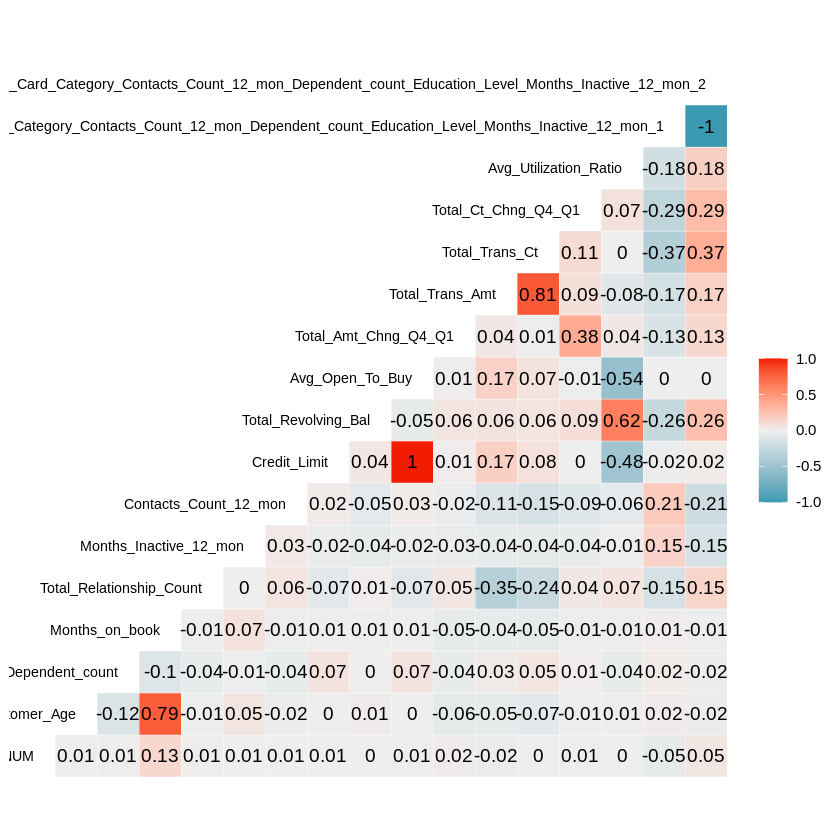

In [ ]:
ggcorr(df, hjust = 1, size = 3, color = "black", label_round = 2, label = TRUE) 

Dari tampilan di atas, dapat diketahui bahwa ada 5 hubungan antara dua variabel yang tergolong kuat karena nilai korelasinya yang lebih besar dari 0,5. Empat diantarnya positif kuat, dan satu negatif kuat. Hubungan-hubungan tersebut adalah :




*   Credit_Limit dengan Avg_Open_To_Buy (Nilai korelasi = 1)
*   Total_Trans_Amt dengan Total_Trans_Ct (Nilai korelasi = 0,81)
*   Customer_Age dengan Months_On_Book (Nilai korelasi = 0,79)
*   Total_Revolving_Bal dengan Avg_Utilization_Ratio (Nilai korelasi = 0,62)
*   Avg_Open_To_Buy dengan Avg_Utilization_Ratio (Nilai korelasi = -0,54)



Sekarang, mari kita uraikan satu persatu semua hubungan tersebut.
 



# a. Credit_Limit dengan Avg_Open_To_Buy

Untuk memudahkan analisis kita, mari kita visualisasikan hubungan tersebut ke dalam bentuk scatter plot.

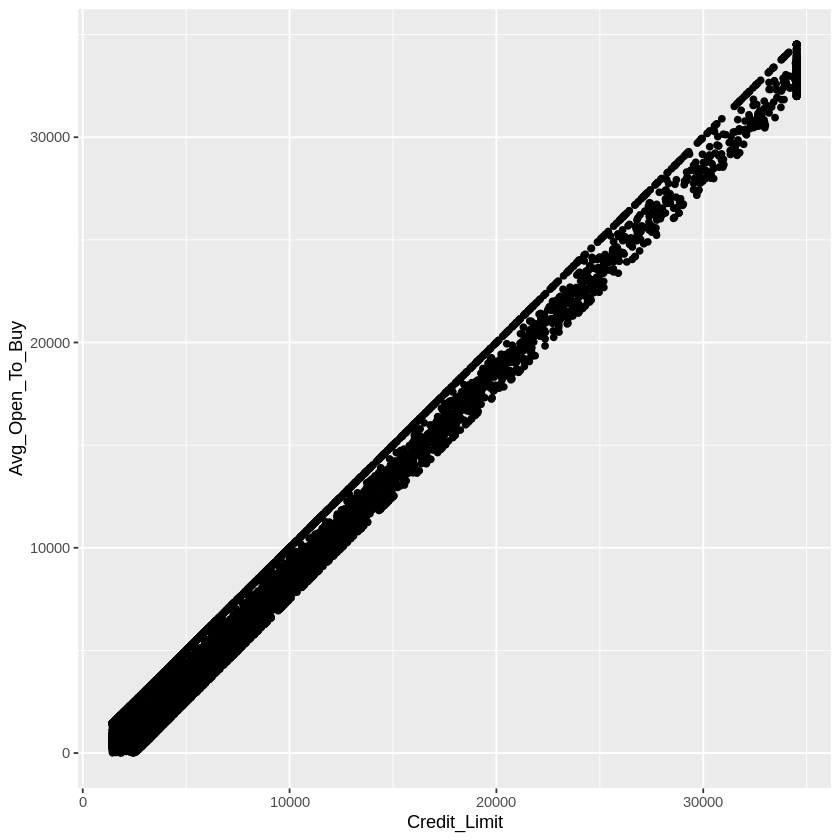

In [ ]:
ggplot(data=df, aes(x=Credit_Limit, y=Avg_Open_To_Buy)) + geom_point() 

Grafik scatter plot yang terbentuk sangatlah sempurna. Nilai korelasi antara keduanya yaitu 1, maka ini mencerminkan korelasi positif sempurna antara Credit Limit dengan Average Open To Buy. Artinya Credit Limit dengan Average Open To Buy memiliki hubungan yang searah, semakin tinggi nilai credit limit, maka nilai average open to buy juga ikut tinggi.


Untuk mengetahui ada tidaknya korelasi, sekarang saatnya untuk melakukan correlation test dengan uji hipotesis. Terdapat dua hipotesis yang mungkin ;

Ho : korelasi antar kedua data adalah 0/ tidak ada korelasi

H1 : korelasi antar kedua data tidak sama dengan 0/ terdapat korelasi

Untuk membuat keputusan antara terima Ho atau tolak Ho, bisa kita bandingkan antara tingkat kesalahan Ho dengan H1

In [ ]:
cor.test(df$Credit_Limit, df$Avg_Open_To_Buy, method = "pearson")


	Pearson's product-moment correlation

data:  df$Credit_Limit and df$Avg_Open_To_Buy
t = 1118.9, df = 10125, p-value < 2.2e-16
alternative hypothesis: true correlation is not equal to 0
95 percent confidence interval:
 0.9958212 0.9961338
sample estimates:
      cor 
0.9959805 


Ho memiliki tingkat kepercayaan 95%, ini berarti tingkat kesalahannya yaitu 5% atau 0,05. Sedangkan H1, tingkat kesalahannya dapat diperoleh dari p-value. Pada data diatas, p-value bernilai 2.2e-16. Bila kita bandingkan antara Ho dengan H1, H1 memiliki tingkat kesalahan yang lebih kecil daripada Ho.

Oleh karena itu, dapat ditarik kesimpulan untuk tolak Ho dan terima H1. Jadi, terdapat hubungan yang linier antara Credit limit dengan Average open to buy.

Untuk langkah selanjutnya, kita bisa mengaitkan antara dua variabel tersebut dengan fokus utama kita yaitu variabel Attrition Flag. Kita dapat menggunakan scatter plot 3 dimensi untuk mengamatinya.

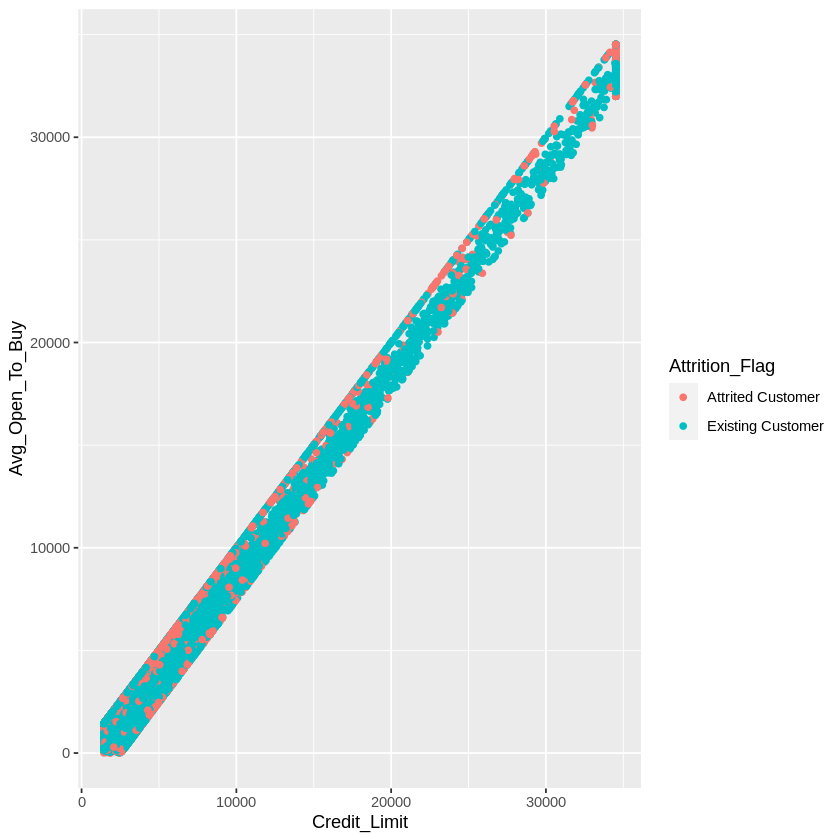

In [ ]:
ggplot(data=df, aes(x=Credit_Limit, y=Avg_Open_To_Buy, color=Attrition_Flag)) + 
geom_point()

Terlihat bahwa Existing customer dan Attrited customer sama-sama menyebar dari nilai terkecil hingga terbesar. Jika grafiknya dipecah menjadi dua untuk masing-masing kategori, akan terlihat seperti ini ;

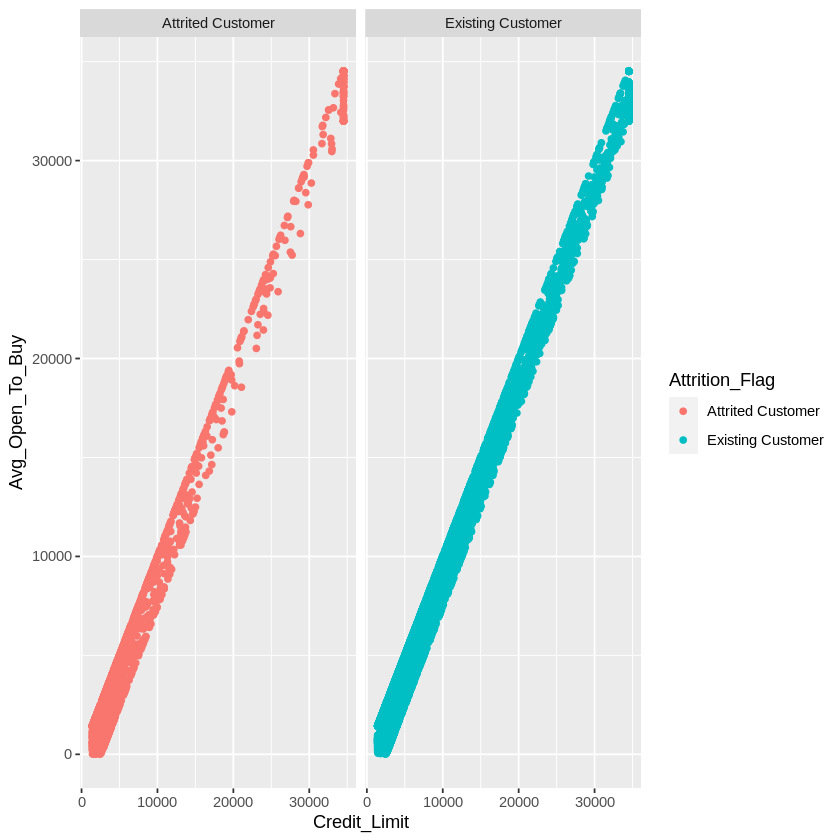

In [ ]:
ggplot(data=df, aes(x=Credit_Limit, y=Avg_Open_To_Buy, color=Attrition_Flag)) + 
geom_point() +
facet_wrap(~Attrition_Flag, ncol=2)

Existing customer memang lebih mendominasi karena jumlahnya yang lebih banyak dibanding attrited customer. Tapi bentuk scatter plot yang dihasilkan keduanya menunjukkan arah positif dan hubungan yang kuat.

# b. Total_Trans_Amt dengan Total_Trans_Ct 

Untuk memudahkan analisis kita, mari kita visualisasikan hubungan tersebut ke dalam bentuk scatter plot

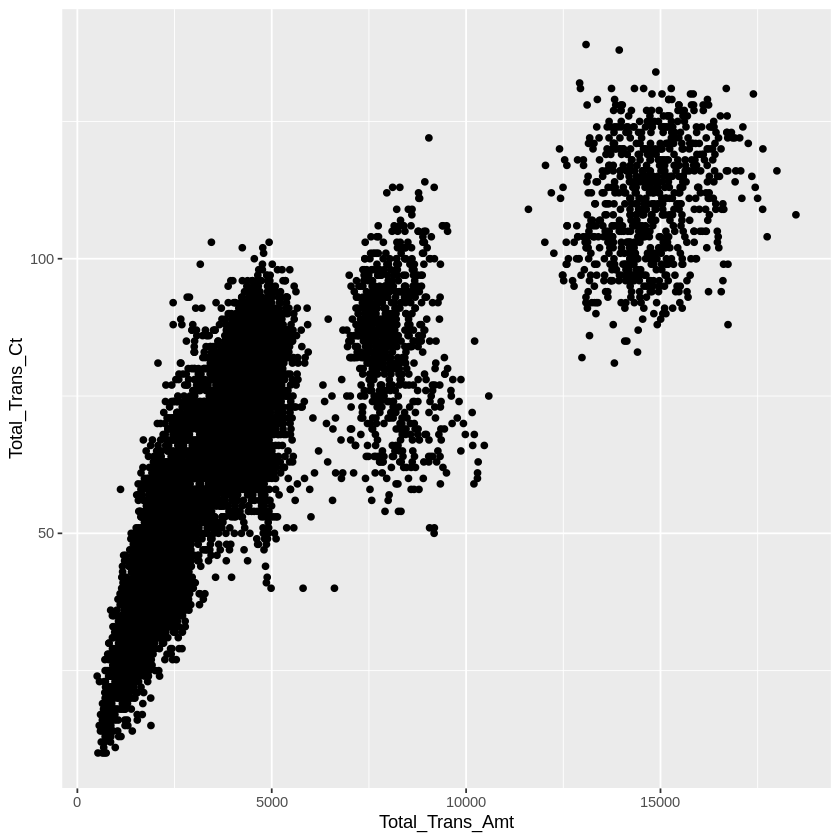

In [ ]:
ggplot(data=df, aes(x=Total_Trans_Amt, y=Total_Trans_Ct)) + geom_point()

Grafik scatter plot yang terbentuk menunjukkan adanya kecenderungan korelasi positif antara Total transaction Amount dengan Total transaction Count. Nilai korelasi antara keduanya yaitu 0,81 maka ini mencerminkan korelasi positif kuat antara Total transaction Amount dengan Total transaction Count. Artinya Total transaction Amount dengan Total transaction Count memiliki hubungan yang searah, bila Total transaction Amount naik, maka Total transaction Count akan cenderung naik juga.

Untuk mengetahui ada tidaknya korelasi, sekarang saatnya untuk melakukan correlation test dengan uji hipotesis. Terdapat dua hipotesis yang mungkin ;

Ho : korelasi antar kedua data adalah 0/ tidak ada korelasi

H1 : korelasi antar kedua data tidak sama dengan 0/ terdapat korelasi

Untuk membuat keputusan antara terima Ho atau tolak Ho, bisa kita bandingkan antara tingkat kesalahan Ho dengan H1

In [ ]:
cor.test(df$Total_Trans_Amt, df$Total_Trans_Ct, method = "pearson")


	Pearson's product-moment correlation

data:  df$Total_Trans_Amt and df$Total_Trans_Ct
t = 137.6, df = 10125, p-value < 2.2e-16
alternative hypothesis: true correlation is not equal to 0
95 percent confidence interval:
 0.8002971 0.8138735
sample estimates:
     cor 
0.807192 


Ho memiliki tingkat kepercayaan 95%, ini berarti tingkat kesalahannya yaitu 5% atau 0,05. Sedangkan H1, tingkat kesalahannya dapat diperoleh dari p-value. Pada data diatas, p-value bernilai 2.2e-16. Bila kita bandingkan antara Ho dengan H1, H1 memiliki tingkat kesalahan yang lebih kecil daripada Ho.

Oleh karena itu, dapat ditarik kesimpulan untuk tolak Ho dan terima H1. Jadi, terdapat hubungan yang linier antara Total Transaction Amount dengan Total Transaction Count.

Untuk langkah selanjutnya, kita bisa mengaitkan antara dua variabel tersebut dengan fokus utama kita yaitu variabel Attrition Flag. Kita dapat menggunakan scatter plot 3 dimensi untuk mengamatinya.

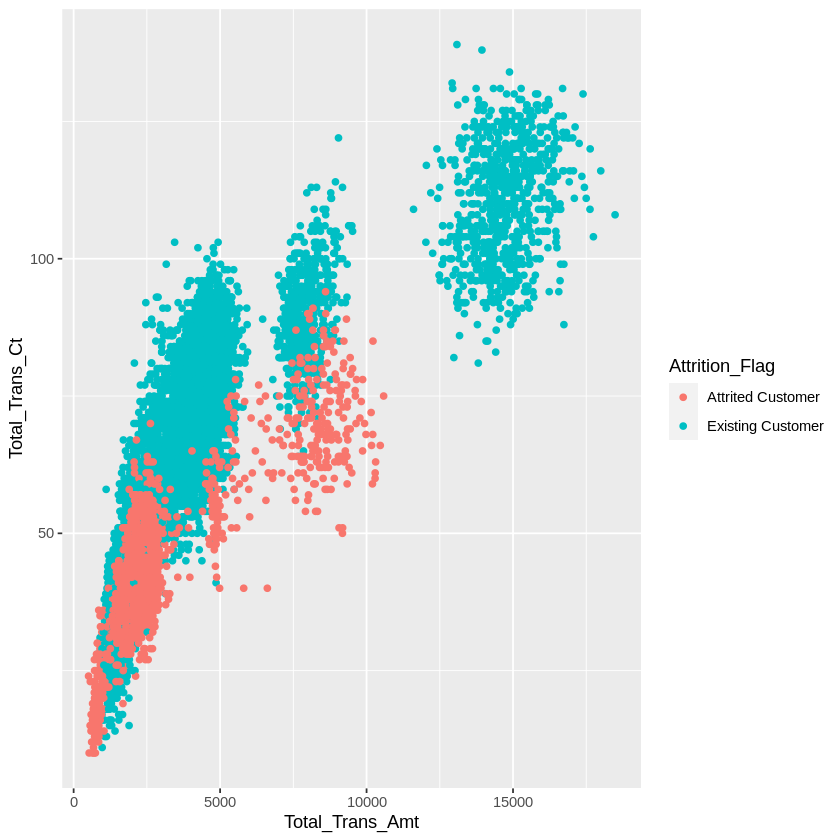

In [ ]:
ggplot(data=df, aes(x=Total_Trans_Amt, y=Total_Trans_Ct, color=Attrition_Flag)) + 
 geom_point()

Dari scatter plot diatas, bisa dilihat bahwa nilai attrited customer ada di kisaran yang lebih rendah dibanding existing customer. Pada bagian total transaction amount yang lebih tinggi dan total transaction count yang lebih tinggi, itu cenderung diisi oleh existing customer. Jika grafiknya dipecah menjadi dua untuk masing-masing kategori, akan terlihat seperti ini ;

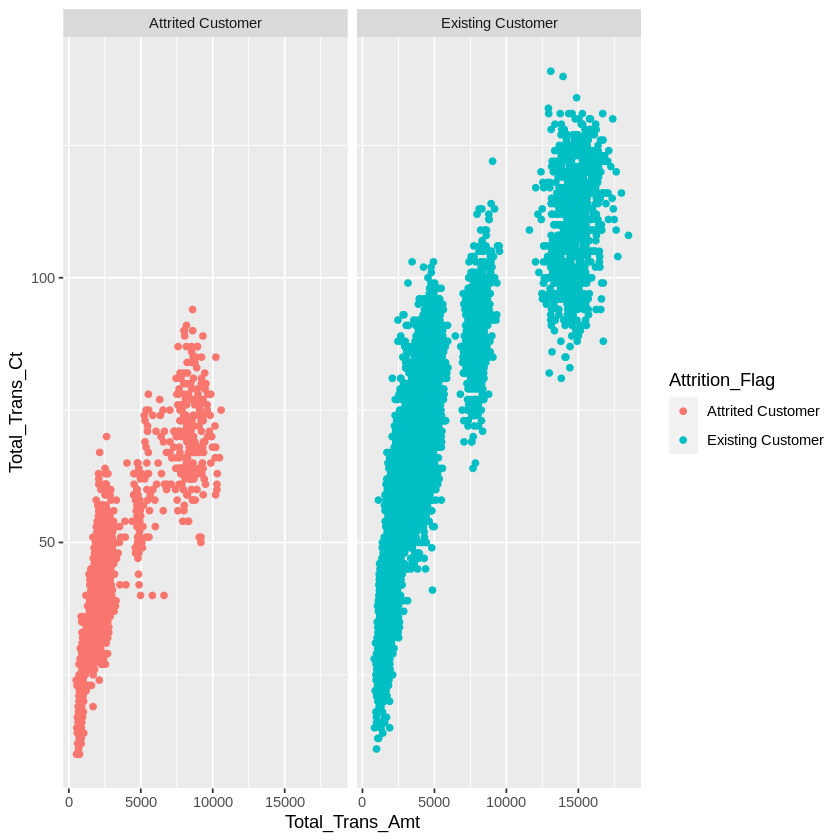

In [ ]:
ggplot(data=df, aes(x=Total_Trans_Amt, y=Total_Trans_Ct, color=Attrition_Flag)) + 
 geom_point() +
 facet_wrap(~Attrition_Flag, ncol=2)

Existing customer memang lebih mendominasi karena jumlahnya yang lebih banyak dibanding attrited customer. Tapi bentuk scatter plot yang dihasilkan keduanya menunjukkan arah positif dan hubungan yang kuat.

# c. Customer_Age dengan Months_On_Book

Untuk memudahkan analisis kita, mari kita visualisasikan hubungan tersebut ke dalam bentuk scatter plot

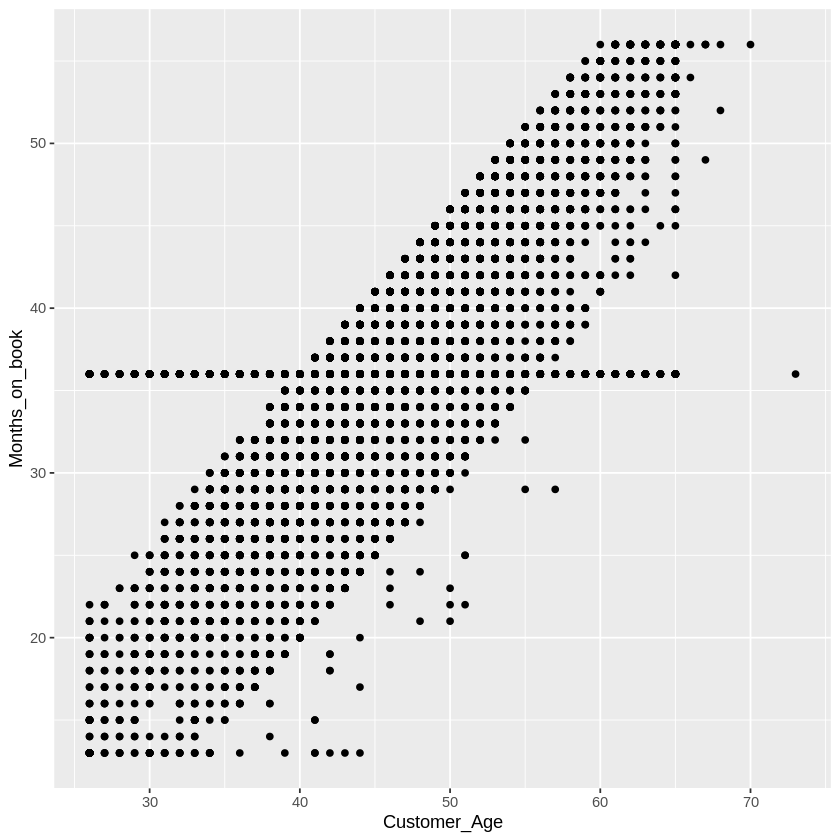

In [ ]:
ggplot(data=df, aes(x=Customer_Age, y=Months_on_book)) + geom_point()

Grafik scatter plot yang terbentuk menunjukkan adanya kecenderungan korelasi positif antara customer age dengan jumlah months on book. Nilai korelasi antara keduanya yaitu 0,78 maka ini mencerminkan korelasi positif kuat antara customer age dengan jumlah months on book. Artinya customer age dengan jumlah months on book memiliki hubungan yang searah, bila nilai customer age naik, maka jumlah months on book akan cenderung naik juga.

Untuk mengetahui ada tidaknya korelasi, sekarang saatnya untuk melakukan correlation test dengan uji hipotesis. Terdapat dua hipotesis yang mungkin ;

Ho : korelasi antar kedua data adalah 0/ tidak ada korelasi

H1 : korelasi antar kedua data tidak sama dengan 0/ terdapat korelasi

Untuk membuat keputusan antara terima Ho atau tolak Ho, bisa kita bandingkan antara tingkat kesalahan Ho dengan H1

In [ ]:
cor.test(df$Customer_Age, df$Months_on_book, method = "pearson")


	Pearson's product-moment correlation

data:  df$Customer_Age and df$Months_on_book
t = 129.18, df = 10125, p-value < 2.2e-16
alternative hypothesis: true correlation is not equal to 0
95 percent confidence interval:
 0.7814428 0.7961558
sample estimates:
      cor 
0.7889124 


Ho memiliki tingkat kepercayaan 95%, ini berarti tingkat kesalahannya yaitu 5% atau 0,05. Sedangkan H1, tingkat kesalahannya dapat diperoleh dari p-value. Pada data diatas, p-value bernilai 2.2e-16. Bila kita bandingkan antara Ho dengan H1, H1 memiliki tingkat kesalahan yang lebih kecil daripada Ho.

Oleh karena itu, dapat ditarik kesimpulan untuk tolak Ho dan terima H1. Jadi, terdapat hubungan yang linier antara  customer age dengan jumlah months on book.

Untuk langkah selanjutnya, kita bisa mengaitkan antara dua variabel tersebut dengan fokus utama kita yaitu variabel Attrition Flag. Kita dapat menggunakan scatter plot 3 dimensi untuk mengamatinya.

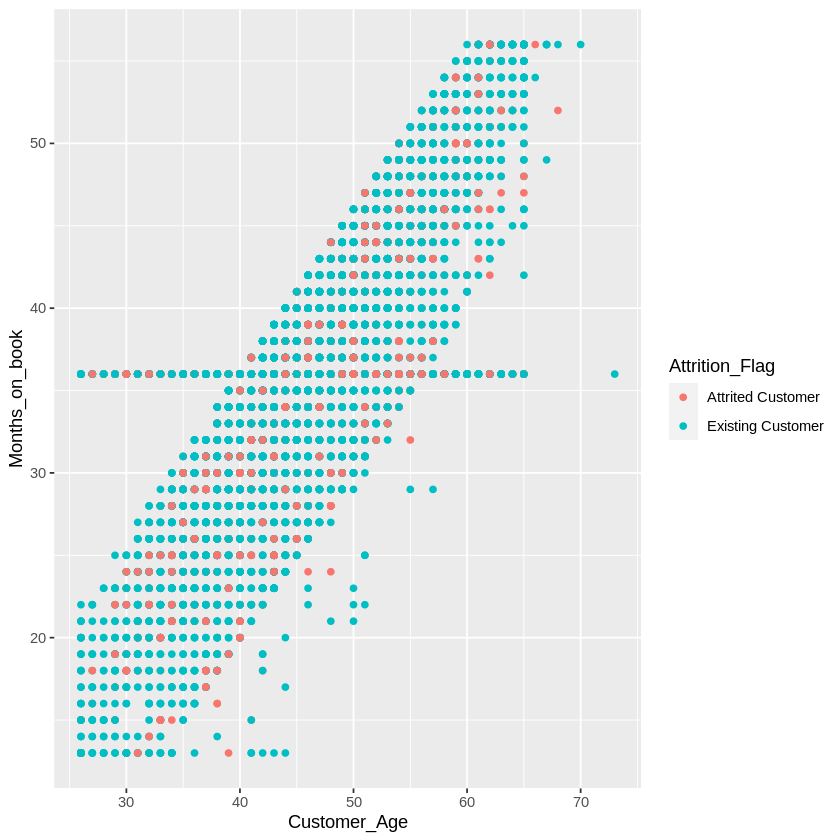

In [ ]:
ggplot(data=df, aes(x=Customer_Age, y=Months_on_book, color=Attrition_Flag)) + 
 geom_point()

Grafik diatas menunjukkan bahwa nilai attrited customer dan existing customer sangat menyebar dari nilai terkecil hingga terbesar. Nilai-nilai tersebut terlihat menyebar dengan acak. Jika grafiknya dipecah menjadi dua untuk masing-masing kategori, akan terlihat seperti ini ;

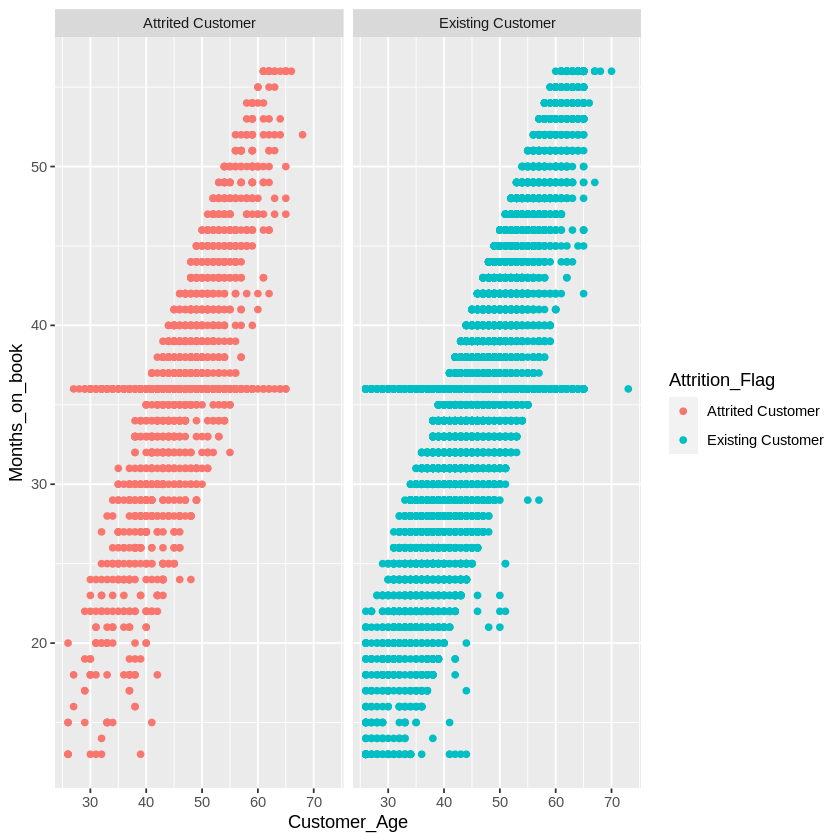

In [ ]:
ggplot(data=df, aes(x=Customer_Age, y=Months_on_book, color=Attrition_Flag)) + 
 geom_point() +
 facet_wrap(~Attrition_Flag, ncol=2)

Jika dipecah seperti ini, dapat dilihat bahwa penyebaran nilainya hampir sama pada kedua kategori. Keduanya tersebar merata dari nilai terkecil hingga terbesar. Tapi bentuk scatter plot yang dihasilkan keduanya menunjukkan arah positif dan hubungan yang kuat.

# d. Total_Revolving_Bal dengan Avg_Utilization_Ratio

Untuk memudahkan analisis kita, mari kita visualisasikan hubungan tersebut ke dalam bentuk scatter plot

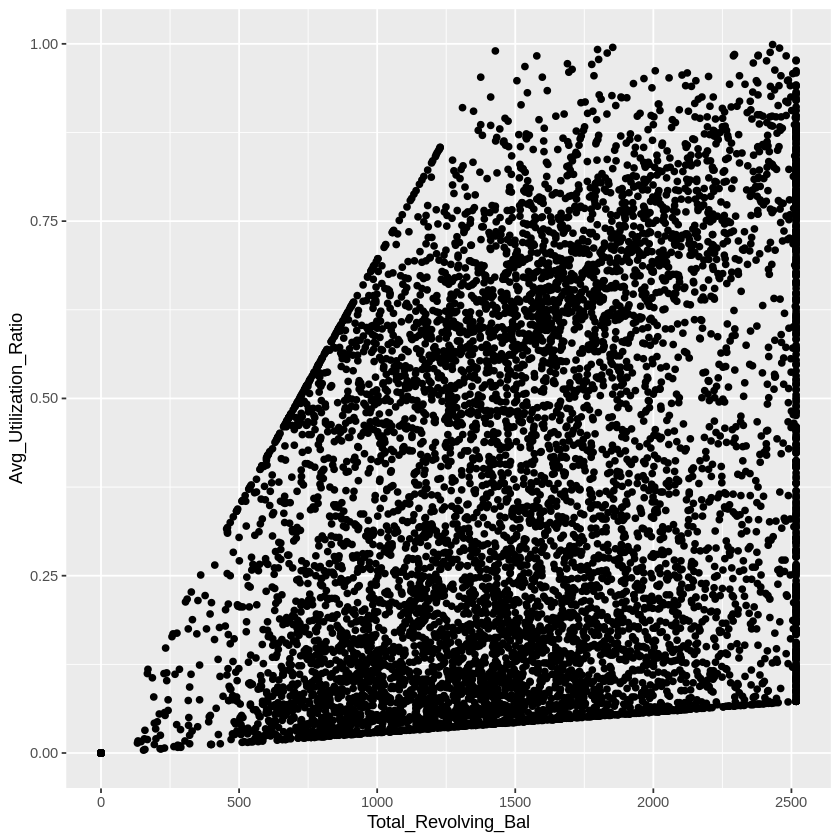

In [ ]:
ggplot(data=df, aes(x=Total_Revolving_Bal, y=Avg_Utilization_Ratio)) + geom_point()

Grafik scatter plot yang terbentuk menunjukkan adanya kecenderungan korelasi positif antara total revolving balance dengan nilai average utilization ratio. Nilai korelasi antara keduanya yaitu 0,62 maka ini mencerminkan korelasi positif kuat antara total revolving balance dengan nilai average utilization ratio. Artinya total revolving balance dengan nilai average utilization ratio memiliki hubungan yang searah, bila nilai total revolving balance naik, maka nilai average utilization ratio akan cenderung naik juga.

Untuk mengetahui ada tidaknya korelasi, sekarang saatnya untuk melakukan correlation test dengan uji hipotesis. Terdapat dua hipotesis yang mungkin ;

Ho : korelasi antar kedua data adalah 0/ tidak ada korelasi

H1 : korelasi antar kedua data tidak sama dengan 0/ terdapat korelasi

Untuk membuat keputusan antara terima Ho atau tolak Ho, bisa kita bandingkan antara tingkat kesalahan Ho dengan H1

In [ ]:
cor.test(df$Total_Revolving_Bal, df$Avg_Utilization_Ratio, method = "pearson")


	Pearson's product-moment correlation

data:  df$Total_Revolving_Bal and df$Avg_Utilization_Ratio
t = 80.356, df = 10125, p-value < 2.2e-16
alternative hypothesis: true correlation is not equal to 0
95 percent confidence interval:
 0.6119832 0.6357716
sample estimates:
     cor 
0.624022 


Ho memiliki tingkat kepercayaan 95%, ini berarti tingkat kesalahannya yaitu 5% atau 0,05. Sedangkan H1, tingkat kesalahannya dapat diperoleh dari p-value. Pada data diatas, p-value bernilai 2.2e-16. Bila kita bandingkan antara Ho dengan H1, H1 memiliki tingkat kesalahan yang lebih kecil daripada Ho.

Oleh karena itu, dapat ditarik kesimpulan untuk tolak Ho dan terima H1. Jadi, terdapat hubungan yang linier antara  total revolving balance dengan nilai average utilization ratio.

Untuk langkah selanjutnya, kita bisa mengaitkan antara dua variabel tersebut dengan fokus utama kita yaitu variabel Attrition Flag. Kita dapat menggunakan scatter plot 3 dimensi untuk mengamatinya.

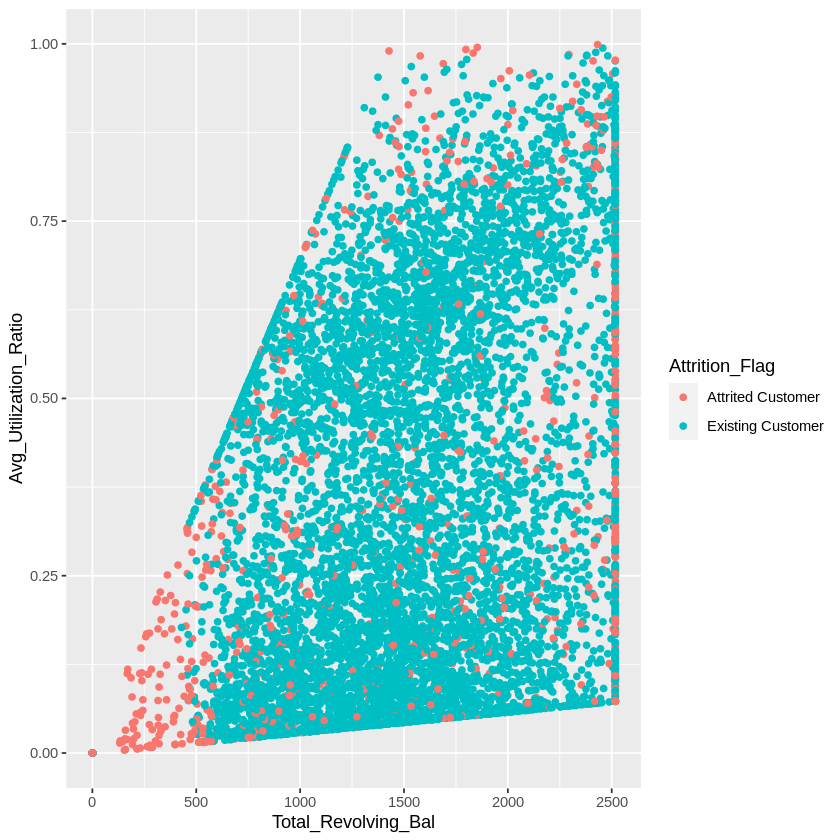

In [ ]:
ggplot(data=df, aes(x=Total_Revolving_Bal, y=Avg_Utilization_Ratio, color=Attrition_Flag)) + 
 geom_point()

Grafik diatas menunjukkan bahwa nilai attrited customer dan existing customer menyebar dari nilai terkecil hingga terbesar. Akan tetapi, pada nilai yang kisarannya kecil, terlihat lebih banyak diisi oleh attrited customer. Jika grafiknya dipecah menjadi dua untuk masing-masing kategori, akan terlihat seperti ini ;

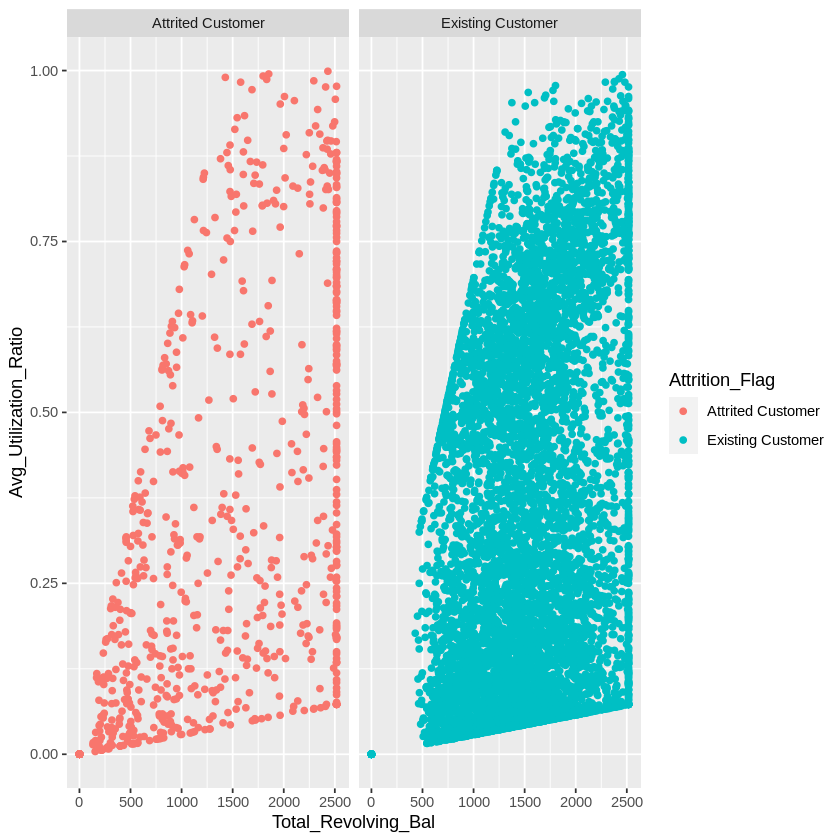

In [ ]:
ggplot(data=df, aes(x=Total_Revolving_Bal, y=Avg_Utilization_Ratio, color=Attrition_Flag)) + 
 geom_point() +
 facet_wrap(~Attrition_Flag, ncol=2)

Penyebaran data pada attrited customer terlihat jarang-jarang dan tidak terlalu menumpuk, tetapi sebaliknya pada existing customer. Ini bisa terjadi karena jumlah existing customer yang lebih banyak daripada attrited customer. Dan bentuk scatter plot yang dihasilkan keduanya menunjukkan arah positif dan hubungan yang kuat.

# e. Avg_Open_To_Buy dengan Avg_Utilization_Ratio

Untuk memudahkan analisis kita, mari kita visualisasikan hubungan tersebut ke dalam bentuk scatter plot

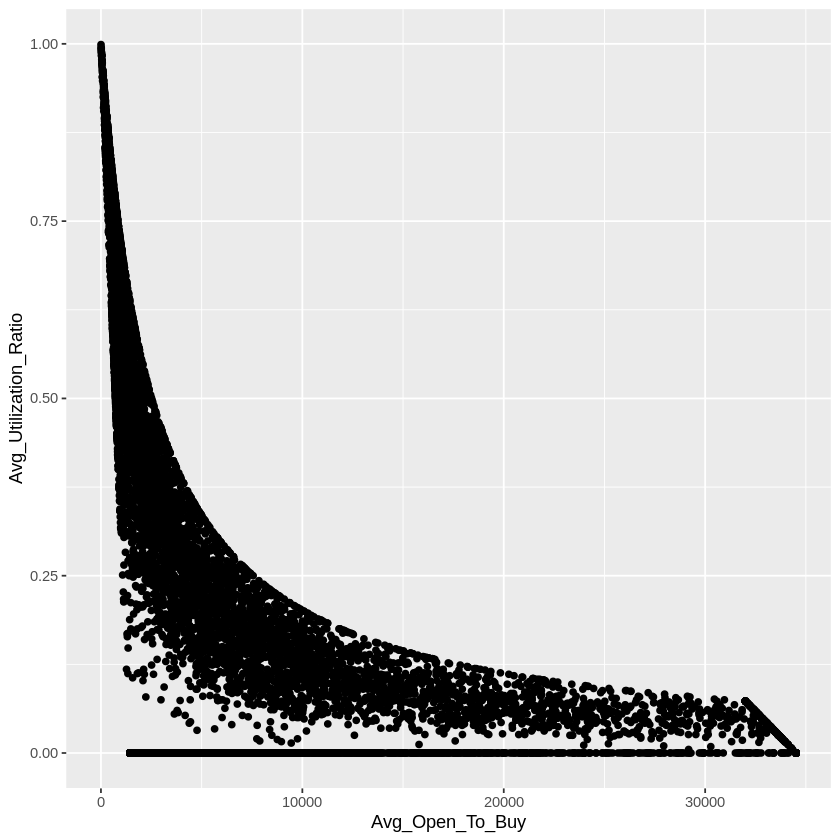

In [ ]:
ggplot(data=df, aes(x=Avg_Open_To_Buy, y=Avg_Utilization_Ratio)) + geom_point()

Grafik scatter plot yang terbentuk menunjukkan adanya kecenderungan korelasi negatif antara Average Open To Buy dengan jumlah Average Utilization Ratio. Nilai korelasi antara keduanya yaitu -0,54 maka ini mencerminkan korelasi negatif kuat antara Average Open To Buy dengan jumlah Average Utilization Ratio. Artinya Average Open To Buy dengan jumlah Average Utilization Ratio saling berkebalikan, jika nilai Average Open To Buy tinggi, maka Average Utilization Ratio menjadi rendah, begitupun sebaliknya.

Untuk mengetahui ada tidaknya korelasi, sekarang saatnya untuk melakukan correlation test dengan uji hipotesis. Terdapat dua hipotesis yang mungkin ;

Ho : korelasi antar kedua data adalah 0/ tidak ada korelasi

H1 : korelasi antar kedua data tidak sama dengan 0/ terdapat korelasi

Untuk membuat keputusan antara terima Ho atau tolak Ho, bisa kita bandingkan antara tingkat kesalahan Ho dengan H1

In [ ]:
cor.test(df$Avg_Open_To_Buy, df$Avg_Utilization_Ratio, method = "pearson")


	Pearson's product-moment correlation

data:  df$Avg_Open_To_Buy and df$Avg_Utilization_Ratio
t = -64.357, df = 10125, p-value < 2.2e-16
alternative hypothesis: true correlation is not equal to 0
95 percent confidence interval:
 -0.5524866 -0.5248388
sample estimates:
       cor 
-0.5388077 


Ho memiliki tingkat kepercayaan 95%, ini berarti tingkat kesalahannya yaitu 5% atau 0,05. Sedangkan H1, tingkat kesalahannya dapat diperoleh dari p-value. Pada data diatas, p-value bernilai 2.2e-16. Bila kita bandingkan antara Ho dengan H1, H1 memiliki tingkat kesalahan yang lebih kecil daripada Ho.

Oleh karena itu, dapat ditarik kesimpulan untuk tolak Ho dan terima H1. Jadi, terdapat hubungan yang linier antara Average Open To Buy dengan jumlah Average Utilization Ratio.

Untuk langkah selanjutnya, kita bisa mengaitkan antara dua variabel tersebut dengan fokus utama kita yaitu variabel Attrition Flag. Kita dapat menggunakan scatter plot 3 dimensi untuk mengamatinya.

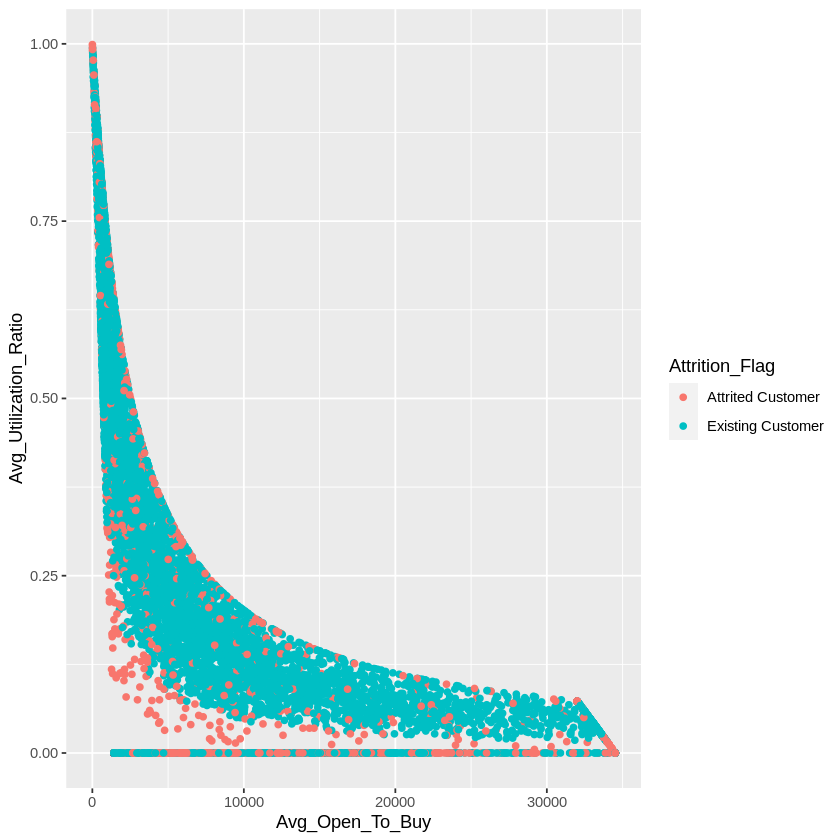

In [ ]:
ggplot(data=df, aes(x=Avg_Open_To_Buy, y=Avg_Utilization_Ratio, color=Attrition_Flag)) + 
geom_point()

Grafik diatas menunjukkan bahwa nilai attrited customer dan existing customer sangat menyebar dari nilai terkecil hingga terbesar. Tetapi, pada nilai yang lebih kecil cenderung diisi oleh attrited customer. Jika grafiknya dipecah menjadi dua untuk masing-masing kategori, akan terlihat seperti ini ;

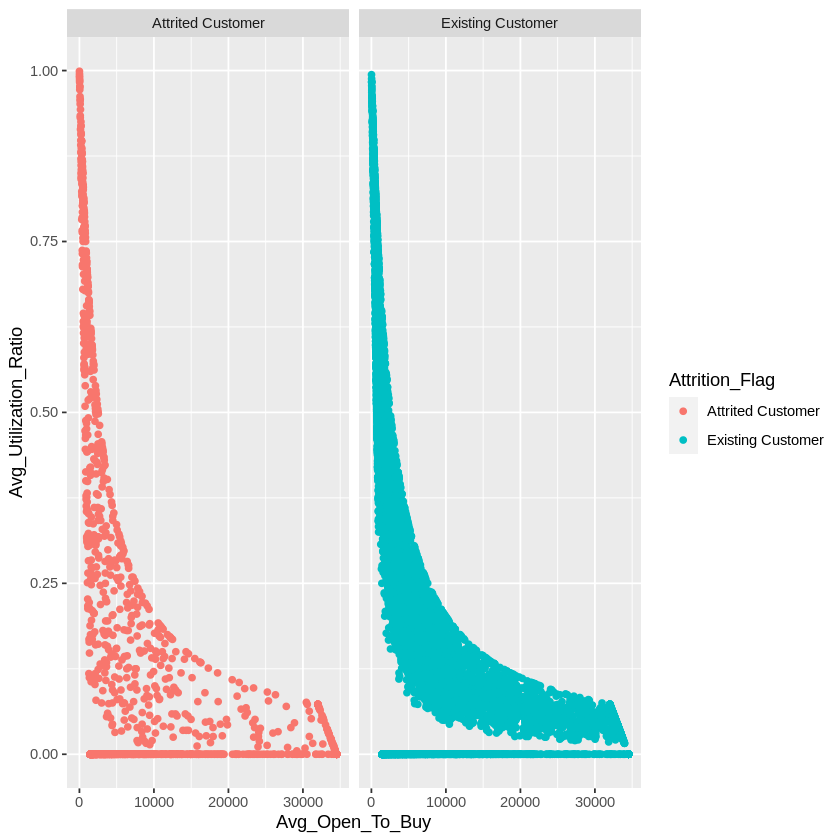

In [ ]:
ggplot(data=df, aes(x=Avg_Open_To_Buy, y=Avg_Utilization_Ratio, color=Attrition_Flag)) + 
 geom_point() +
 facet_wrap(~Attrition_Flag, ncol=2)

Penyebaran data pada attrited customer terlihat jarang-jarang dan tidak terlalu menumpuk, tetapi sebaliknya pada existing customer. Ini bisa terjadi karena jumlah existing customer yang lebih banyak daripada attrited customer. Dan bentuk scatter plot yang dihasilkan keduanya menunjukkan arah positif dan hubungan yang kuat.

# 6. Kesimpulan



1.   Terdapat kesamaan karakteristik dalam hal urutan jumlah terbanyak antara attrition flag (attrited customer dan existing customer) dengan variabel lain yang bertipe kategorik. Variabel-variabel tersebut yang jumlah terbanyaknya sama adalah sebagai berikut. 

            a. Gender          : Female
            b. Education Level : Graduate
            c. Marital Status  : Married
            d. Income Category : Less than $40k
            e. Card Category   : Blue

  Ini artinya, tidak terdapat karakteristik yang jauh berbeda attrited customer dengan existing customer pada variabel yang bertipe kategorik.









2.   Attrited customer memiliki nilai rata-rata yang lebih tinggi daripada existing customer pada variabel-variabel berikut.

            a. Dependent Count
            b. Months Inactive in Last 12 month
            c. Contacts Count in Last 12 month
            d. Customer Age
            e. Months on book
           
    Ini dapat dimaknai bahwa jika ada ada customer dengan nilai-nilai yang semakin besar pada variabel-variabel diatas, maka customer tersebut akan cenderung menjadi attrited customer. Dan hal sebaliknya terjadi pada variabel-variabel yang tidak disebutkan diatas. 

    Dari variabel-variabel diatas, salah satu faktor customer berhenti untuk menggunakan layanan adalah masalah jumlah tanggungan (dependent count). Customer dengan rata-rata jumlah tanggungan yang banyak, lebih berpeluang besar untuk berhenti. Kemudian ada masalah waktu, itu bisa dilihat dari rata-rata umur (costumer age) attrited customer yang lebih tua dan waktu menggunakan layanan (months on book) yang sudah lama. Hingga kemudian, customer tersebut menunjukkan tanda-tanda akan berhenti dengan tidak aktif menggunakan layanan dalam beberapa bulan terakhir. Itu bisa dilihat dari rata-rata tidak aktif dalam 12 bulan terakhir pada attrited customer yang lebih tinggi. 

    Seperti yang kita ketahui, rata-rata credit limit dari attrited customer lebih kecil daripada existing customer. Pembatasan credit limit yang lebih kecil tersebut mungkin menjadi salah satu faktor customer cenderung menjadi tidak aktif. Karena pembatasan credit limit yang lebih kecil itu pula, maka jumlah transaksi yang dilakukan (total transaction count) dan total nominal dari transaksi (total transaction amount) menjadi lebih terbatas. Hingga akhirnya, rata-rata dari dua hal tersebut pada attrited customer menjadi lebih kecil daripada existing customer.


    





3.   Pada variabel kategorik, dua variabel yang saling memiliki hubungan yang adalah :

            a. Attrition Flag dan Gender
            b. Attrition Flag dan Income Category
        
        Sedangkan pada variabel numerik, dua variabel yang saling memiliki hubungan kuat yang adalah :

            a. Credit Limit dengan Average Open To Buy (Positif kuat)
            b. Total Transaction Amount dengan Total Transaction Count (Positif kuat)
            c. Customer Age dengan Months On Book (Positif kuat)
            d. Total Revolving Balance dengan Average Utilization Ratio (Positif kuat)
            e. Average Open To Buy dengan Average Utilization Ratio (Negatif kuat)
   





